In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import numpy as np
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')
from utils import clean

# May_20_Navs

In [3]:
def res_to_voxel(res):
    '''
    converts resolution to its corresponding voxel
    '''
    if(res == '5mm'):
        return 52
    if(res == '6_4mm'):
        return 40
    if(res == '8mm'):
        return 32
    if(res == '10mm'):
        return 26

def get_volumes(res, coil, rot, deg = None):
    '''
    returns a list of 3 repetitions of the given resolution, coil, rotation axis, and degree
    res: resolution
    coil: head or body
    rot: iso, LR or AP
    deg: 1, 3, 5, 7, and 9 degrees
    '''
    if(rot == 'iso'):
        path = 'May_20_Nav/' + res + '/iso/' + coil + '/'
    else:
        path = 'May_20_Nav/' + res + '/' + d + '_' + rot + '/' + coil + '/'
    num_slice = res_to_voxel(res)
    volume = np.empty([num_slice,num_slice,num_slice])
    list_vols = []
    for rep in xrange(3):
        for s in xrange(num_slice):
            file_name = 'EPINavigator_rep_'+str(rep)+'_slice_'+str(s)+'.dat'
            file_path = path + file_name
            if(coil == 'head'):
                slice_ = np.memmap(file_path, dtype=np.complex64, mode='c', shape=(num_slice,4,num_slice))
            if(coil == 'body'):
                slice_ = np.memmap(file_path, dtype=np.complex64, mode='c', shape=(num_slice,1,num_slice))
            slice_ = np.array(np.linalg.norm(slice_,axis=1))                
            volume[s,:,:] = slice_
        list_vols.append(volume)
    return list_vols

In [ ]:
# create a dictionary to store all data
data_dict = {}
# list of resolutions
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    # Create a sub-dictionary for each resolution
    data_dict[res] = {}
    # create sub-dictionaries for head and body coil
    data_dict[res]['body'] = {}
    data_dict[res]['head'] = {}

    # read in iso of head and body coil
    data_dict[res]['body']['iso'] = get_volumes(res = res, coil = 'body', rot = 'iso')
    data_dict[res]['head']['iso'] = get_volumes(res = res, coil = 'head', rot = 'iso')

    # read in the rotated files of head and body coil
    rot_axes = ['LR','AP']
    degrees = ['1deg','3deg','5deg','7deg','9deg']
    for r in rot_axes:
        data_dict[res]['body'][r] = {}
        data_dict[res]['head'][r] = {}
        for d in degrees:
            data_dict[res]['body'][r][d] = get_volumes(res = res, coil = 'body', rot = r, deg = d)
            data_dict[res]['head'][r][d] = get_volumes(res = res, coil = 'head', rot = r, deg = d)

In [5]:
# save the dictionary
pickle.dump(data_dict,open('data_dict.p','wb'))

In [4]:
def plot_volumes(ls, res, coil, rot, deg = None):
    fig, ax = plt.subplots(3,3)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    for i in xrange(3):
        ax[i][0].imshow(ls[i].max(axis=0), interpolation = 'None')
        ax[i][1].imshow(ls[i].max(axis=1), interpolation = 'None')
        ax[i][2].imshow(ls[i].max(axis=2), interpolation = 'None')
    if(deg == None):
        plt.suptitle(res+'_'+coil+'_'+rot, fontsize=20)
    else:
        plt.suptitle(res+'_'+coil+'_'+rot+'_'+deg, fontsize=20)
    plt.show()
    plt.close(fig)

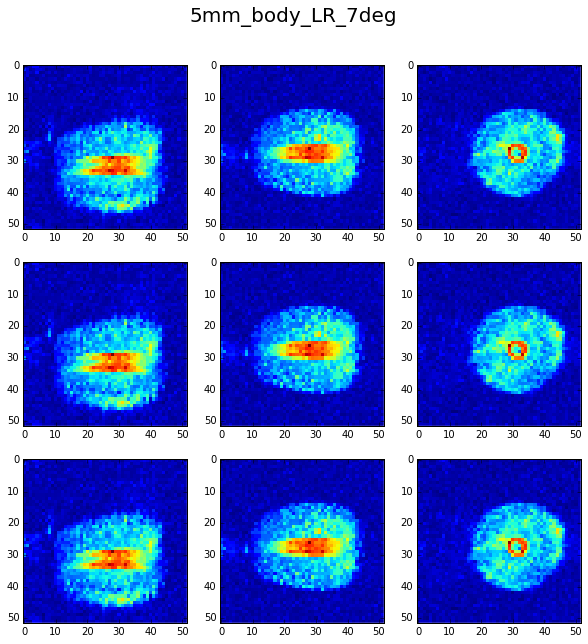

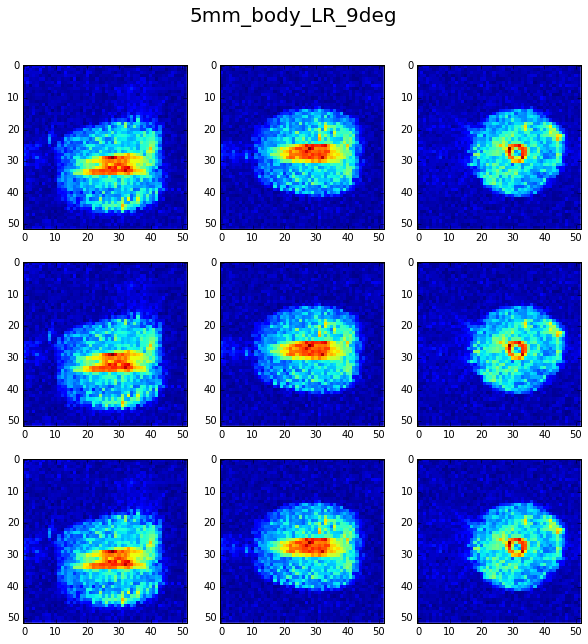

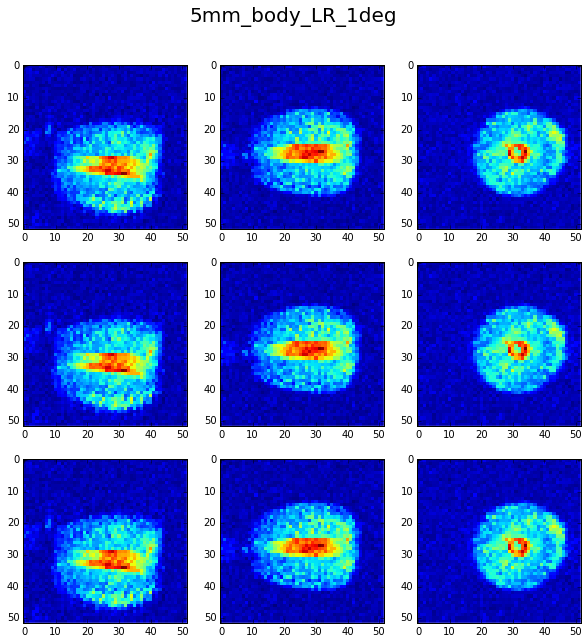

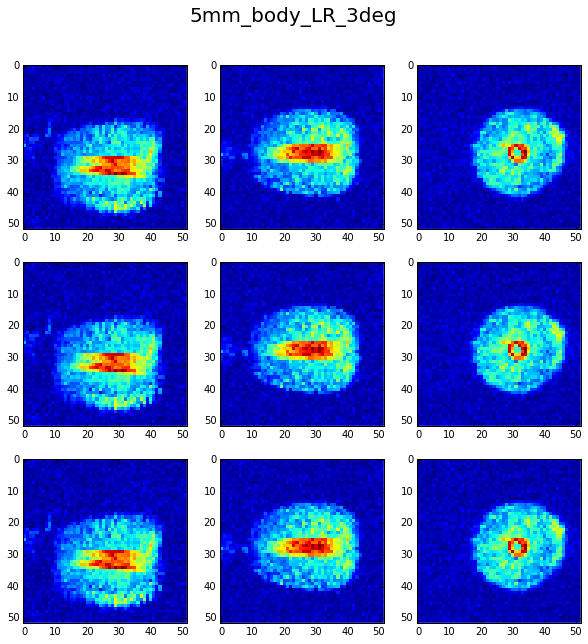

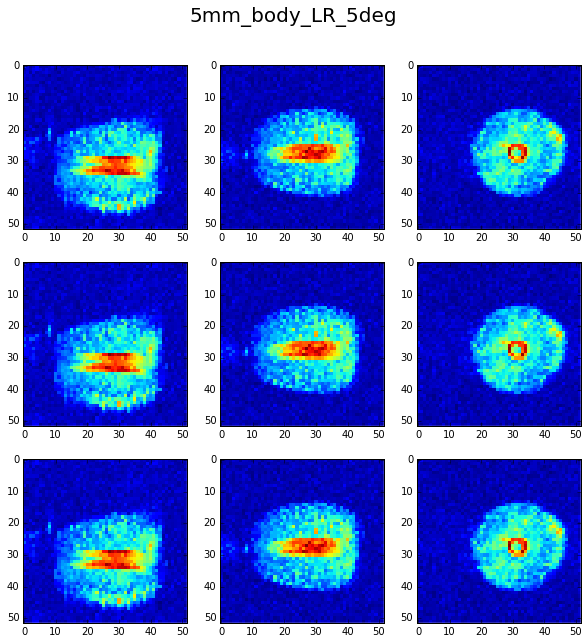

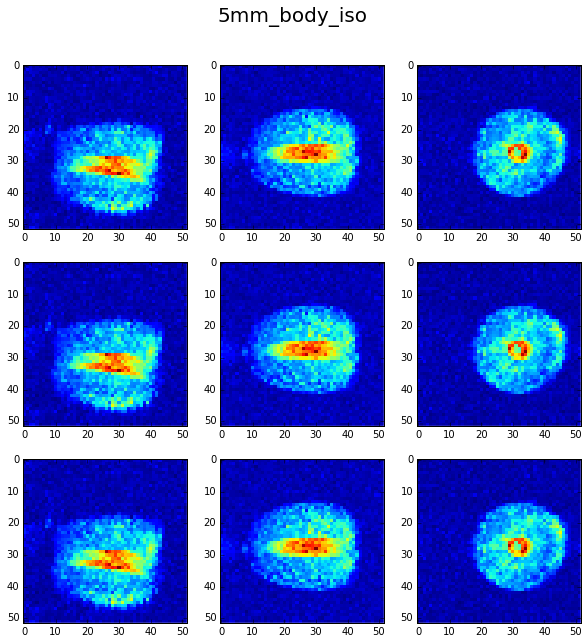

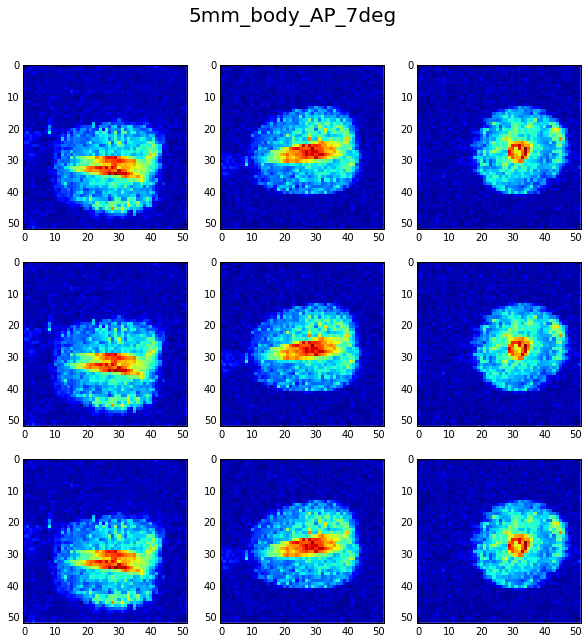

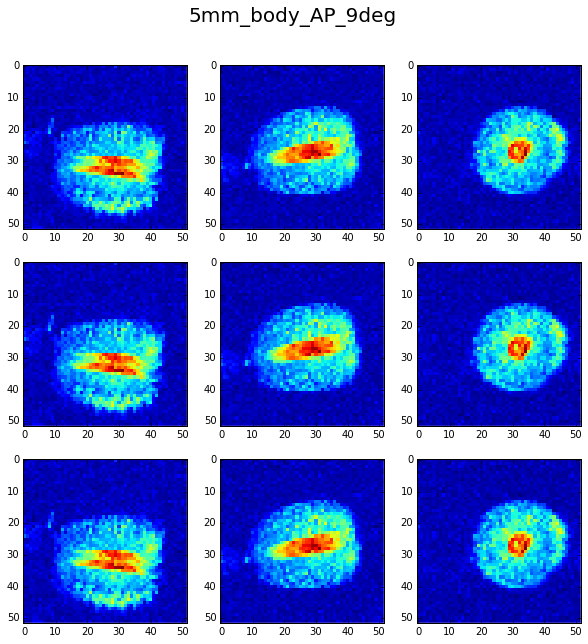

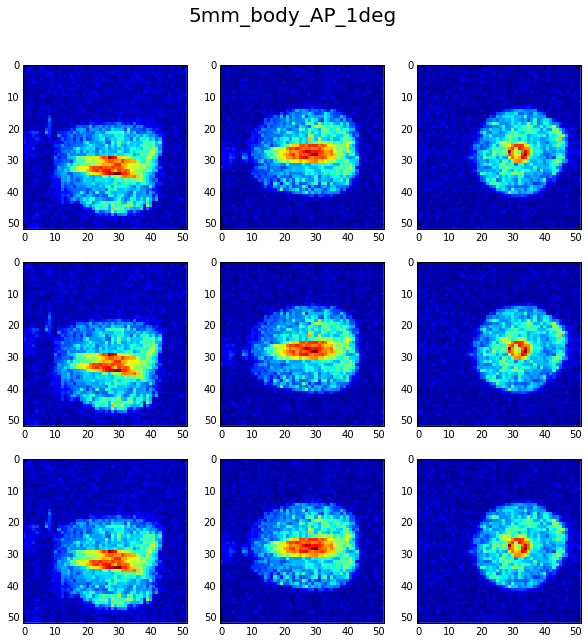

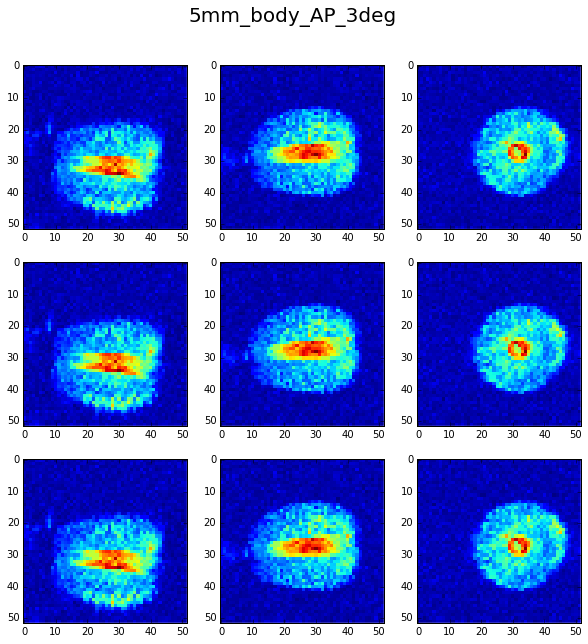

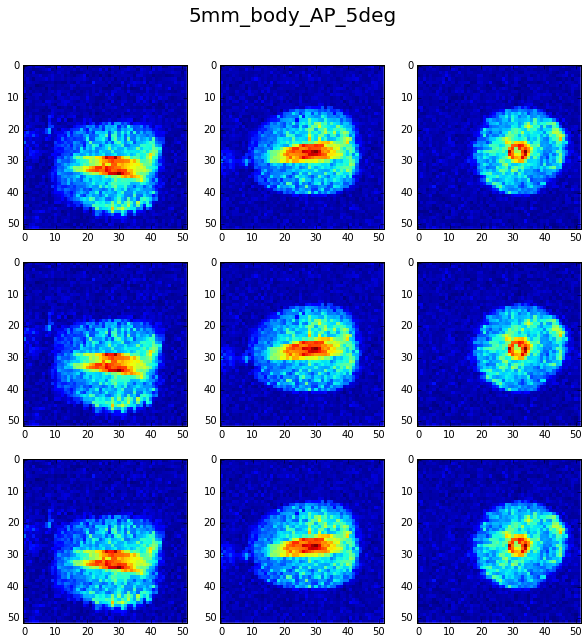

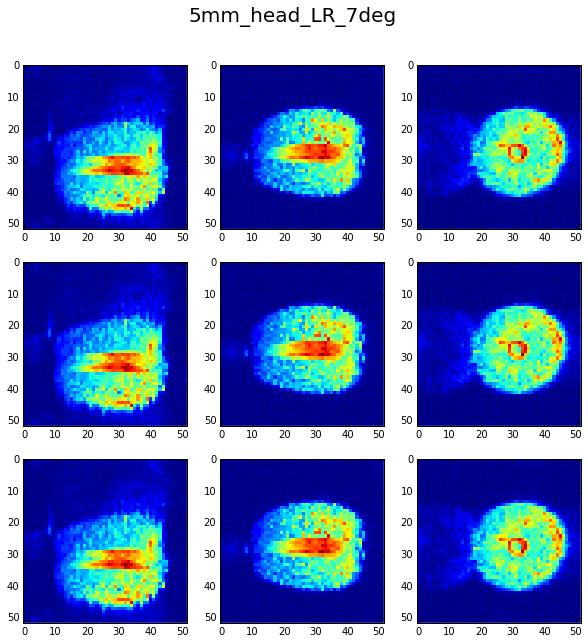

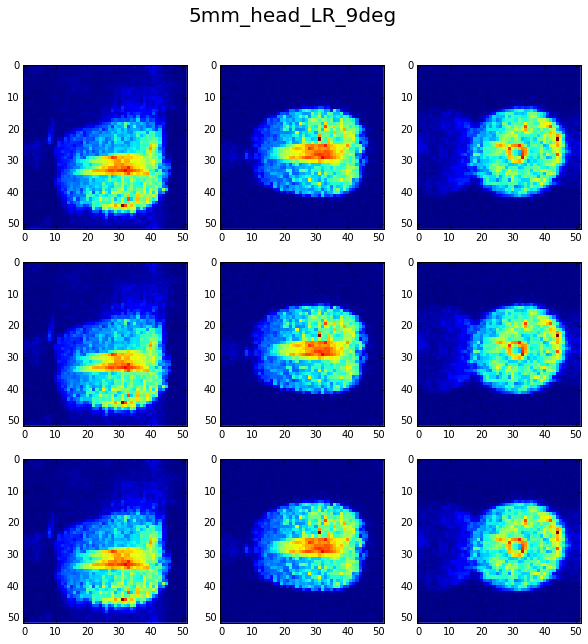

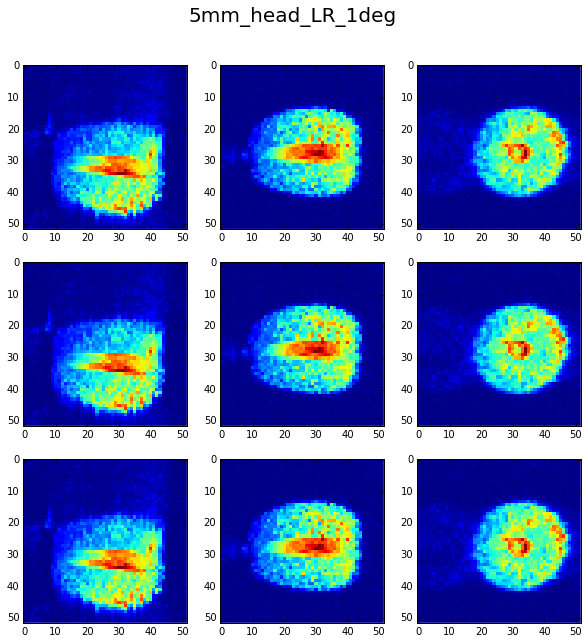

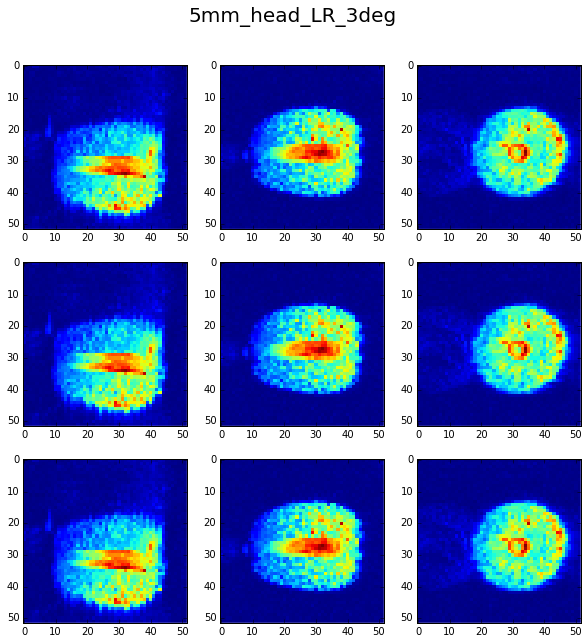

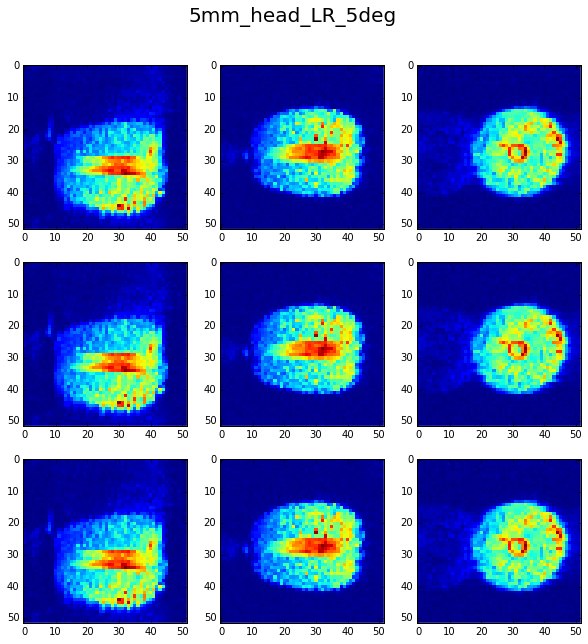

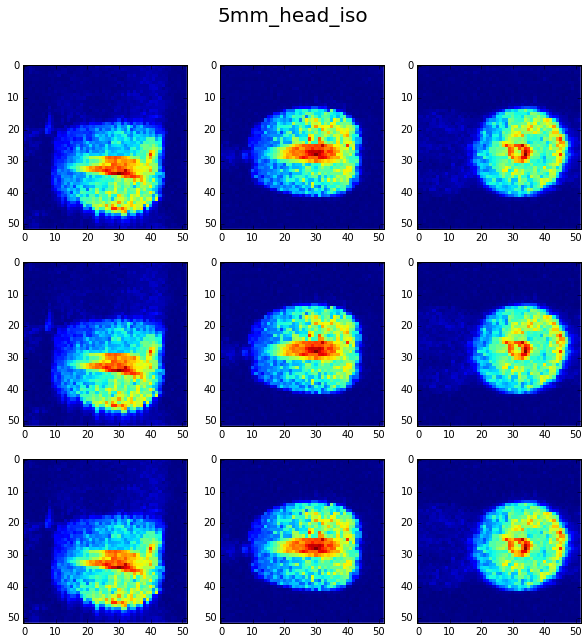

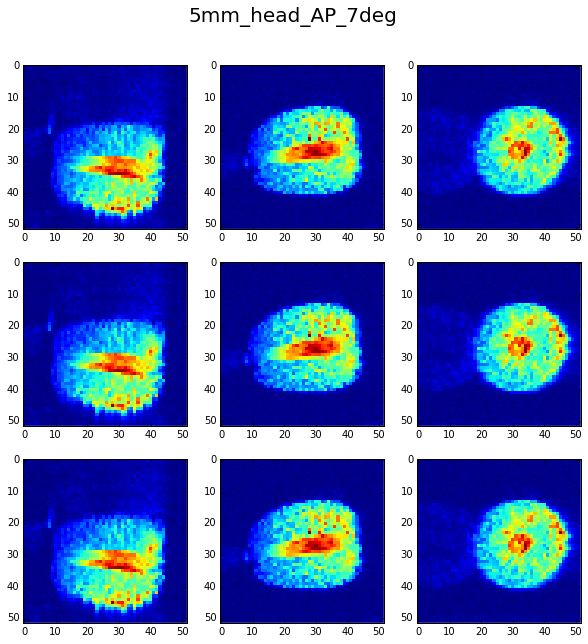

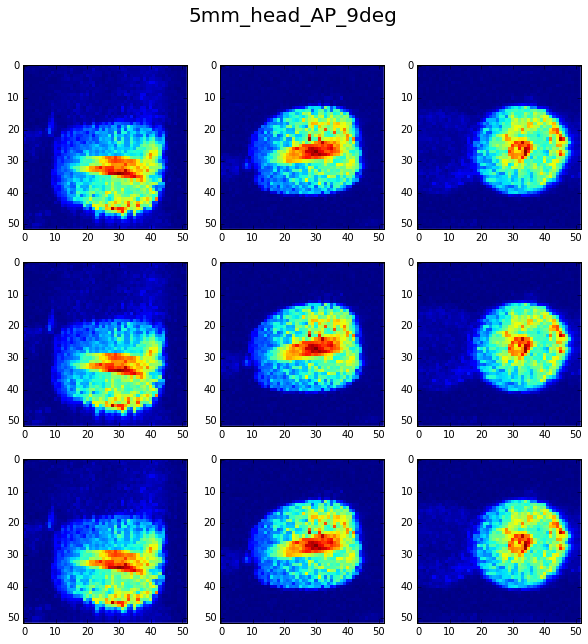

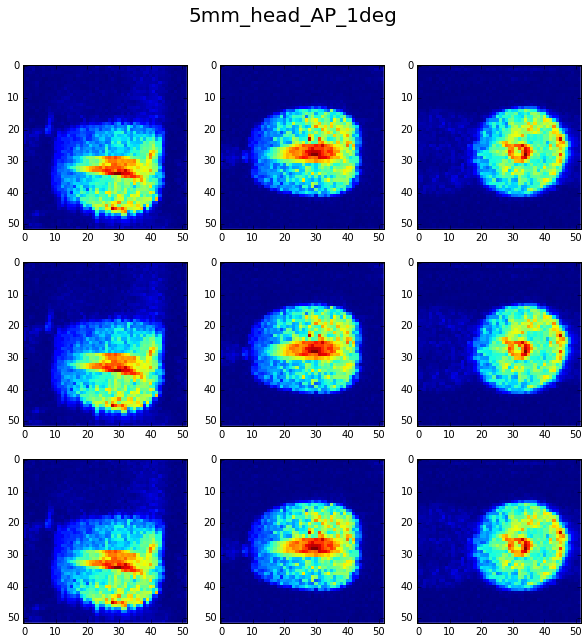

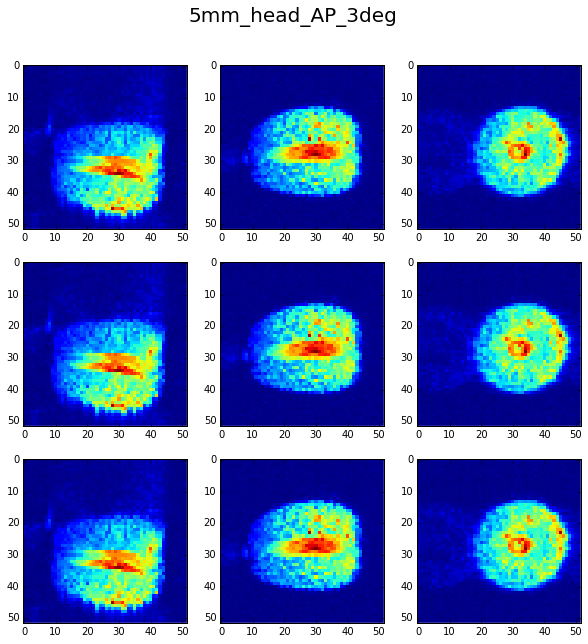

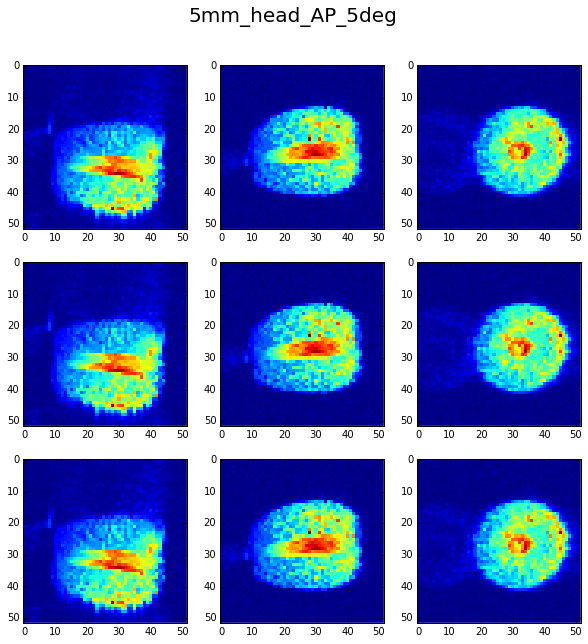

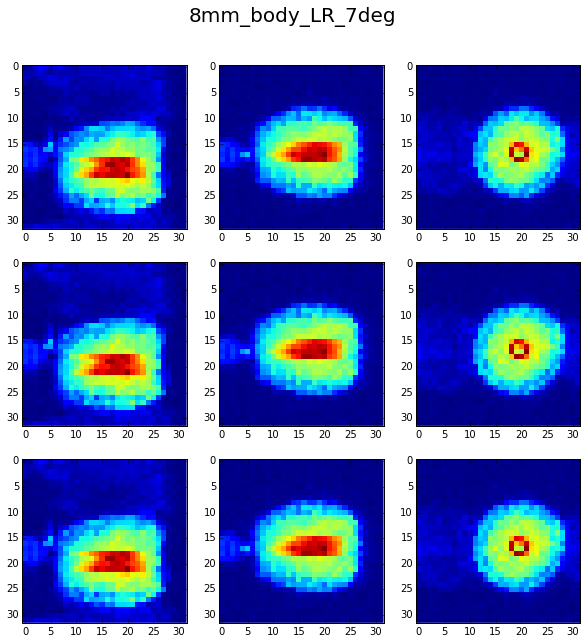

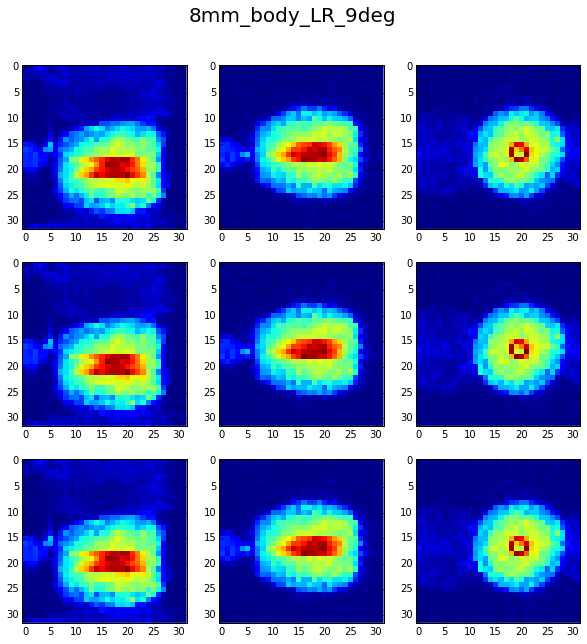

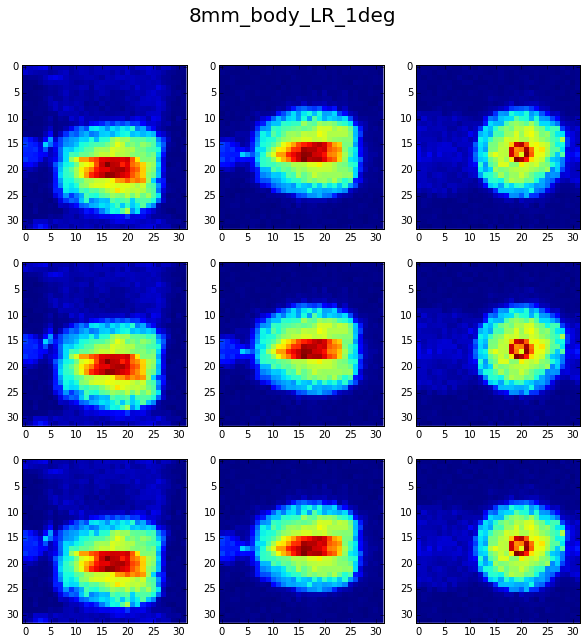

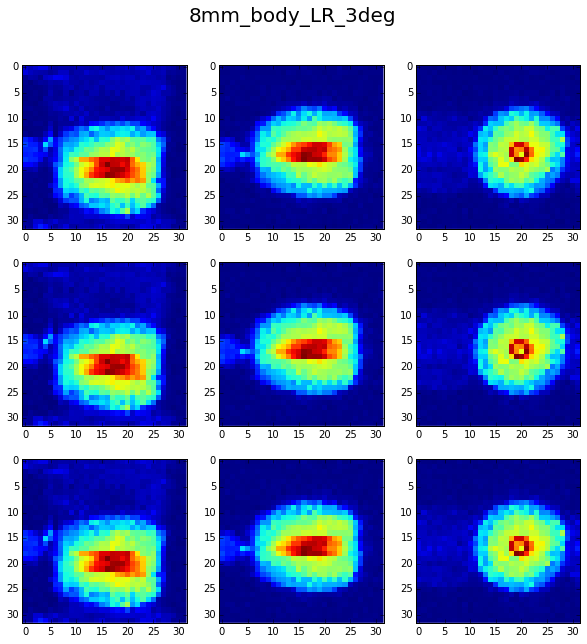

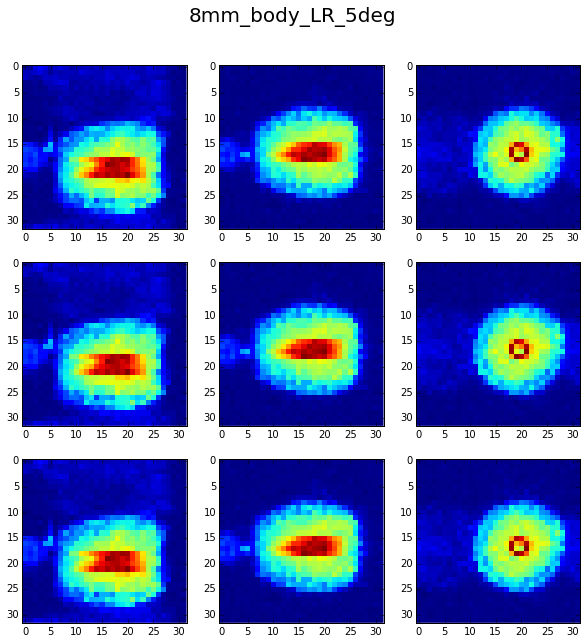

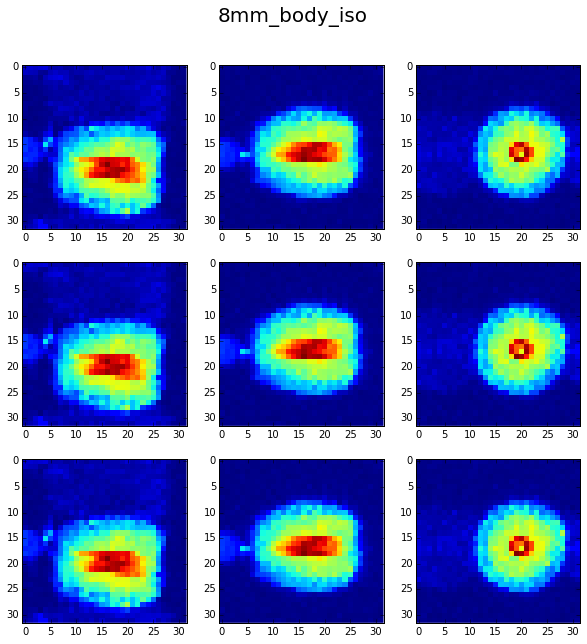

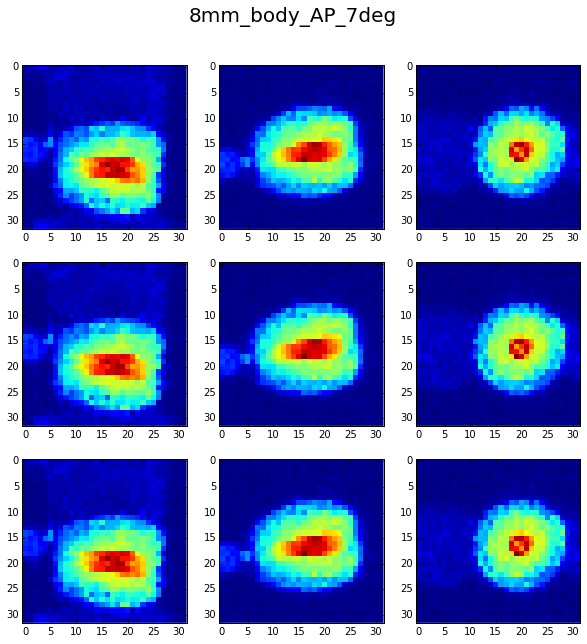

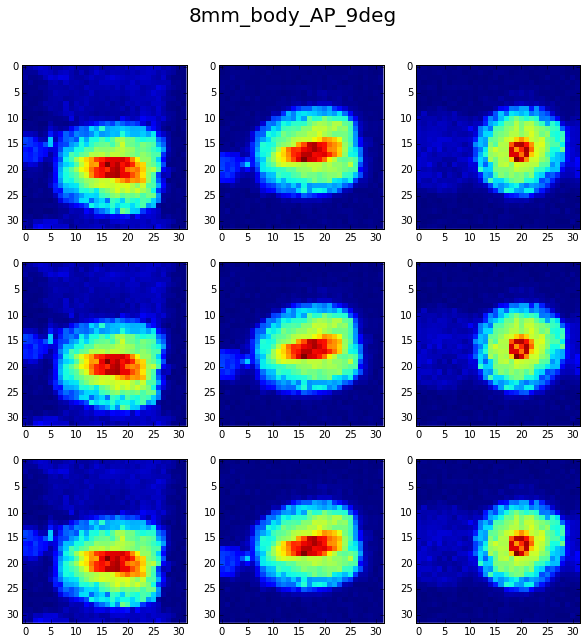

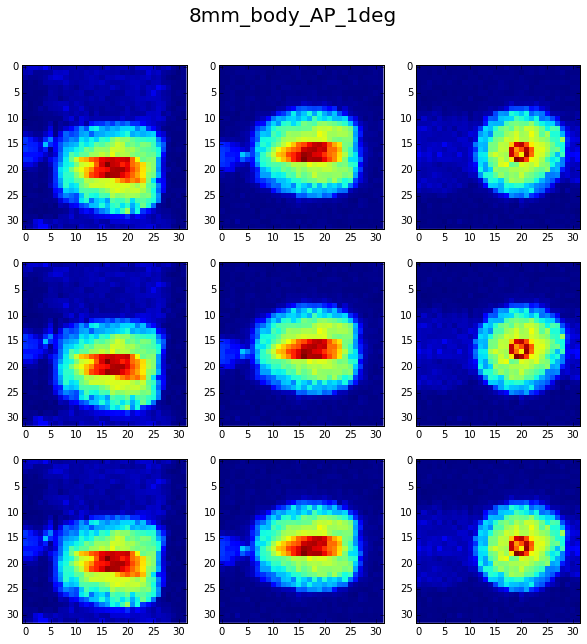

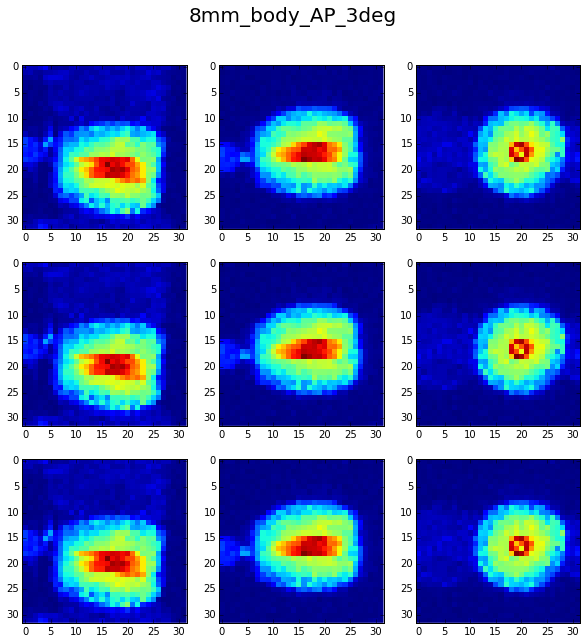

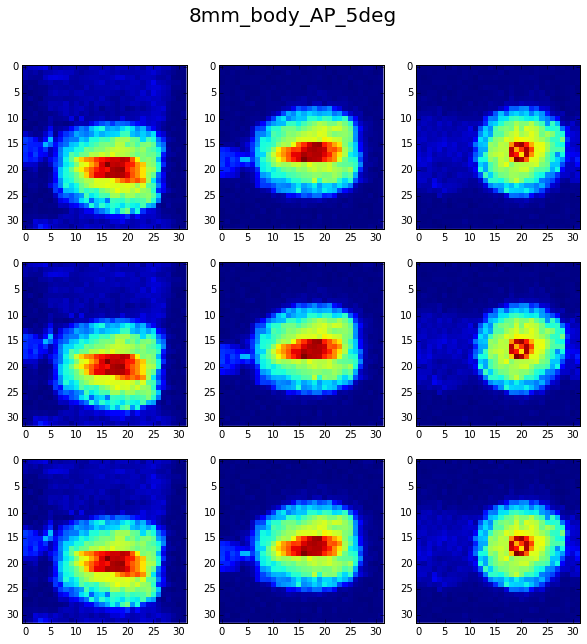

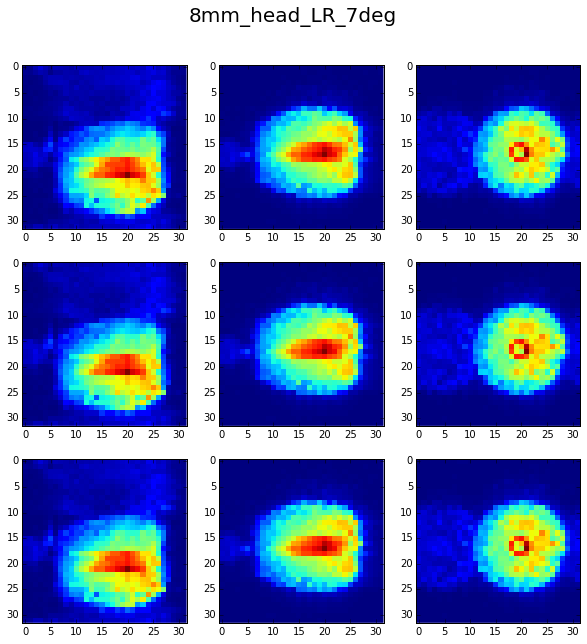

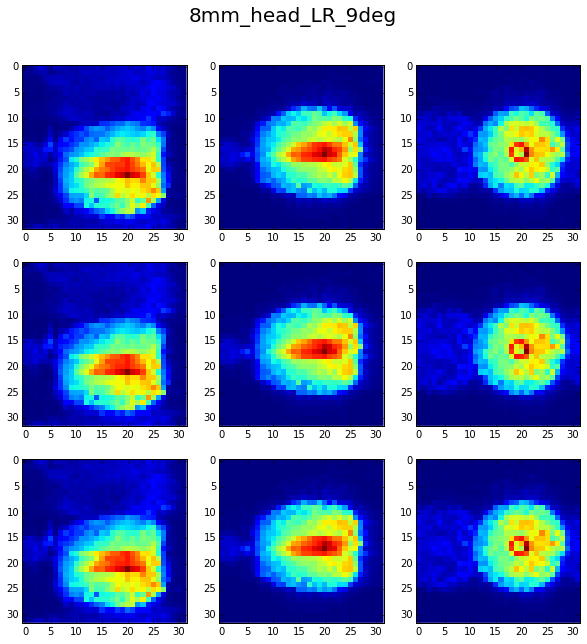

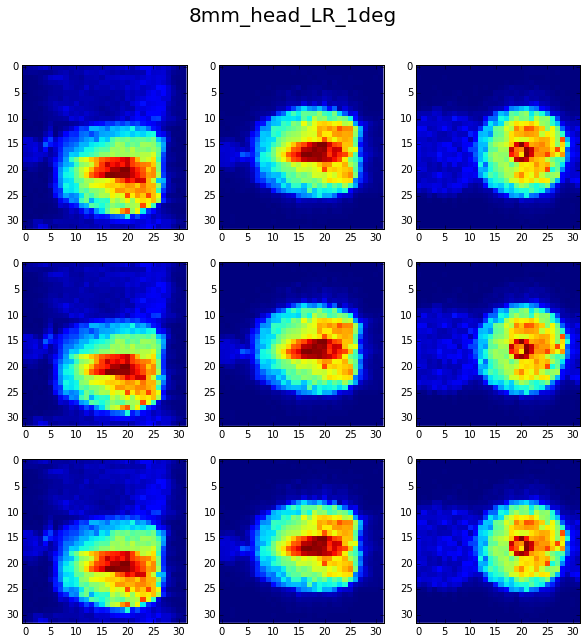

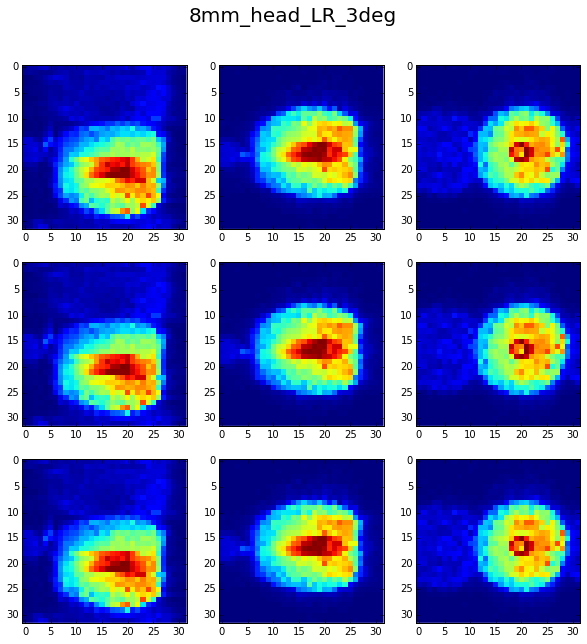

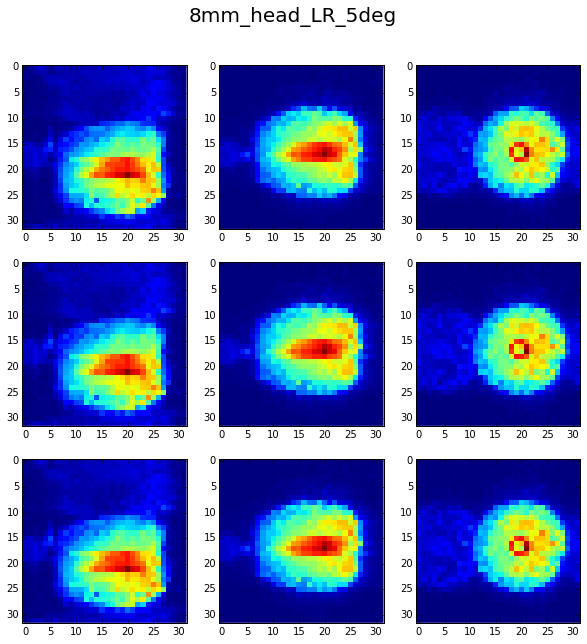

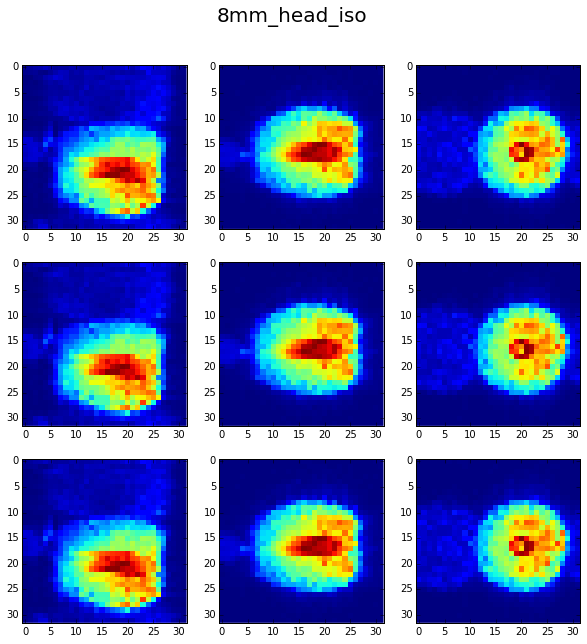

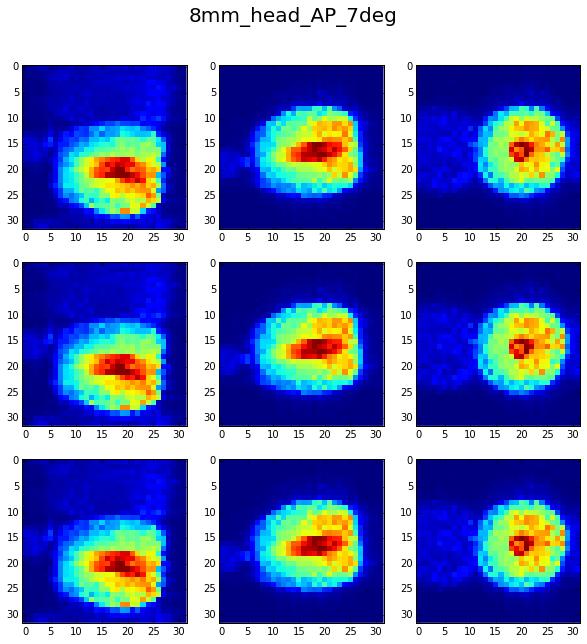

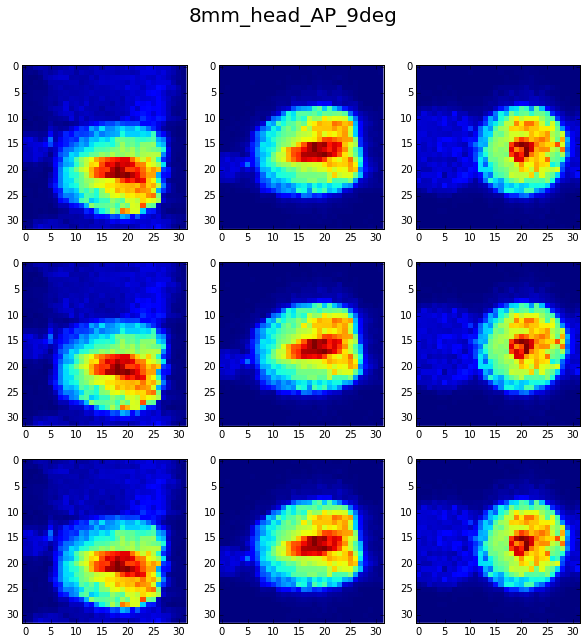

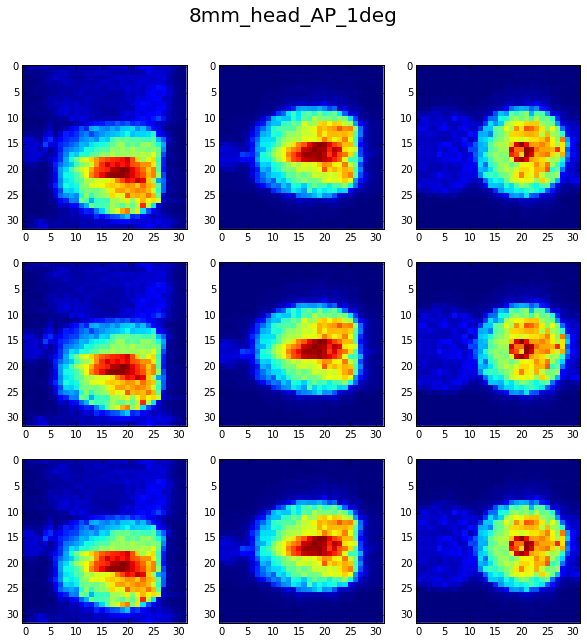

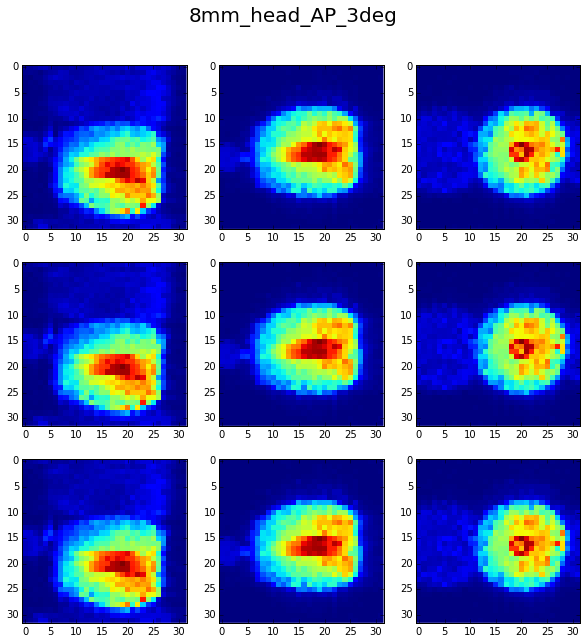

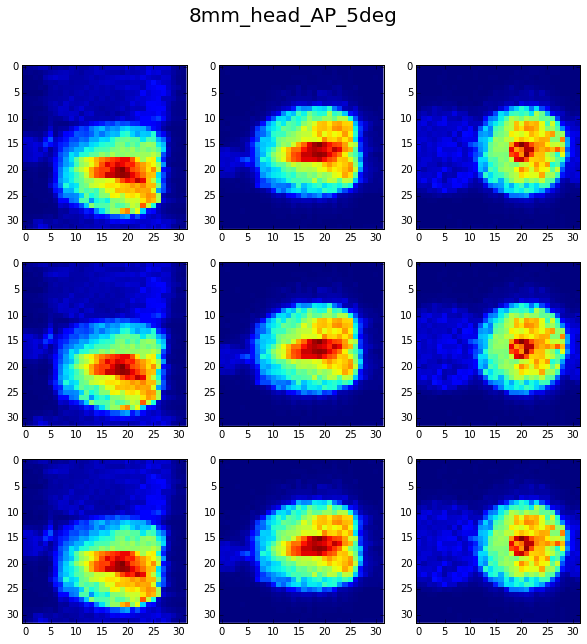

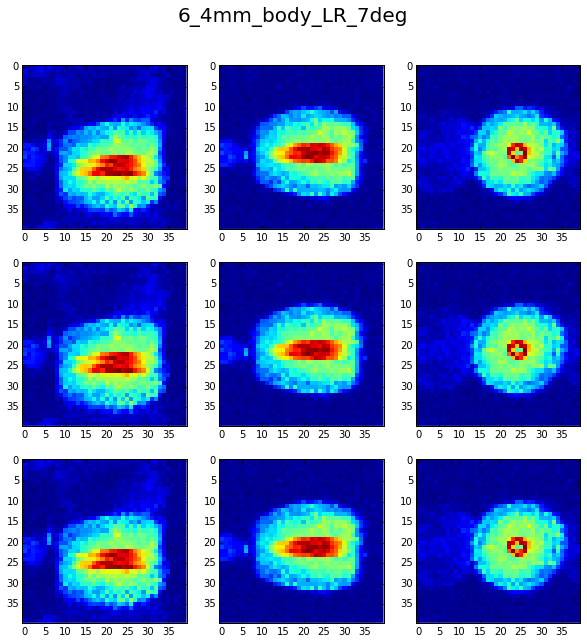

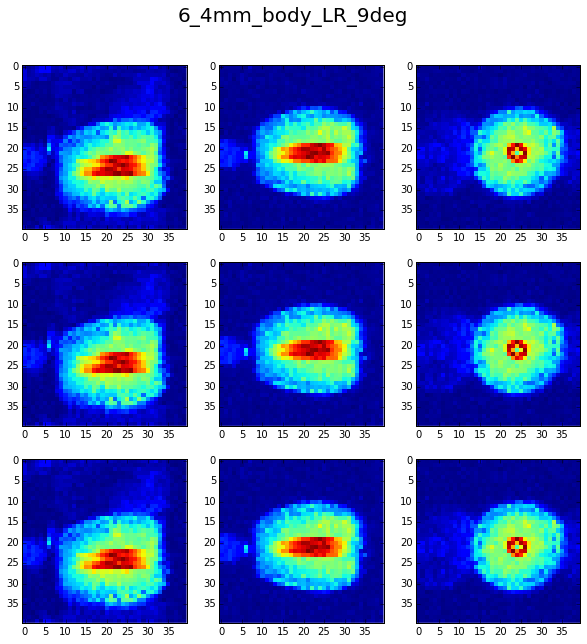

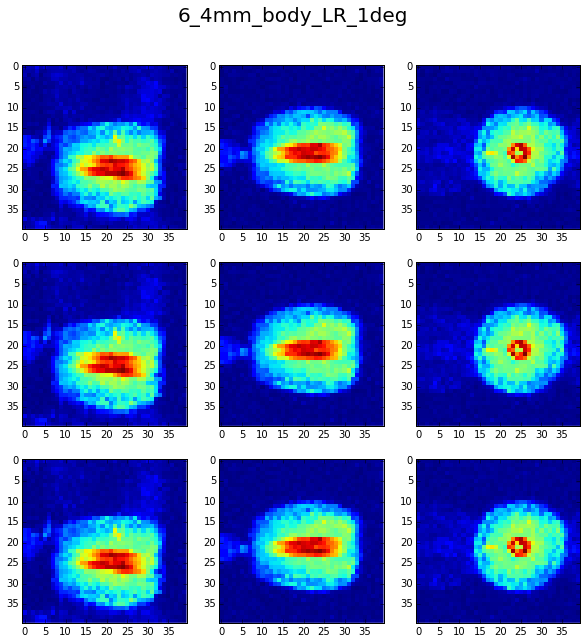

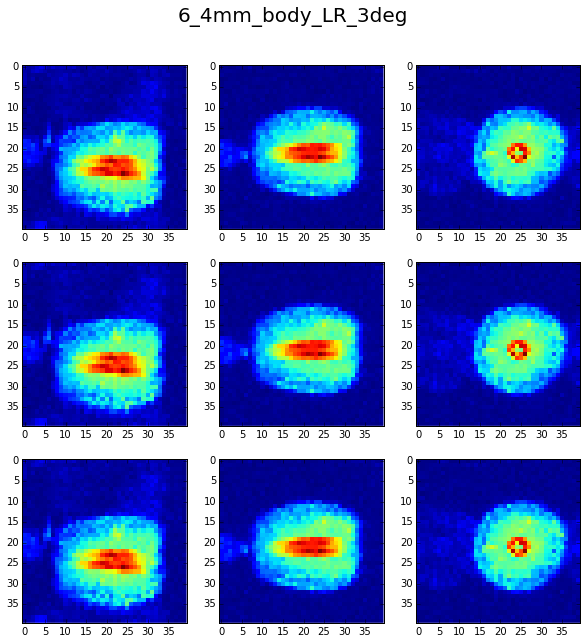

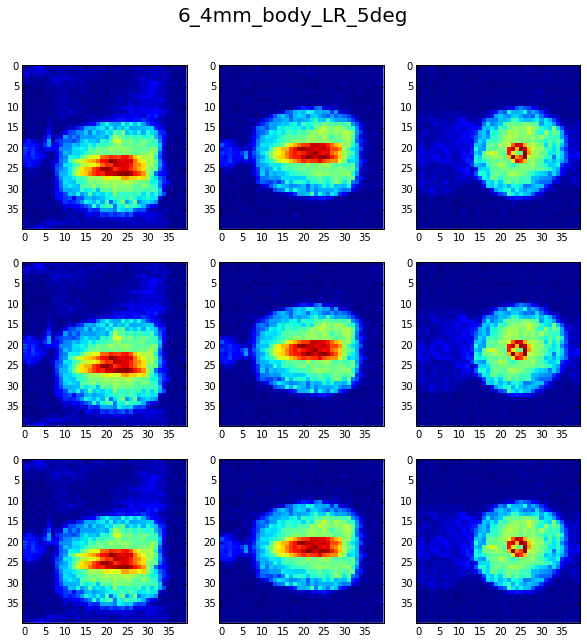

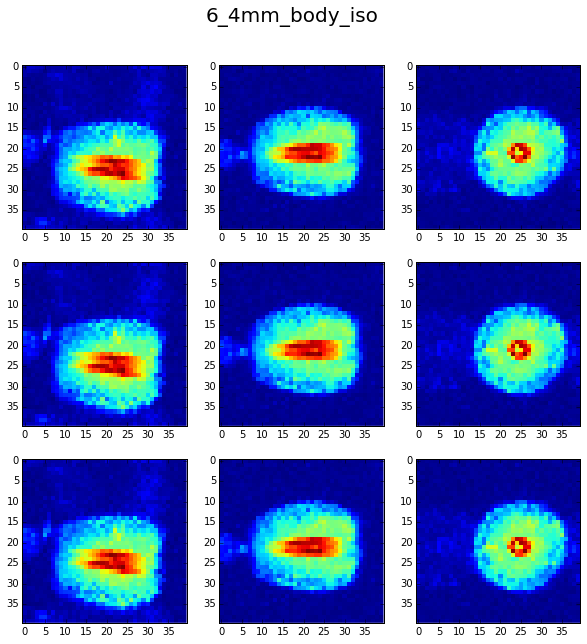

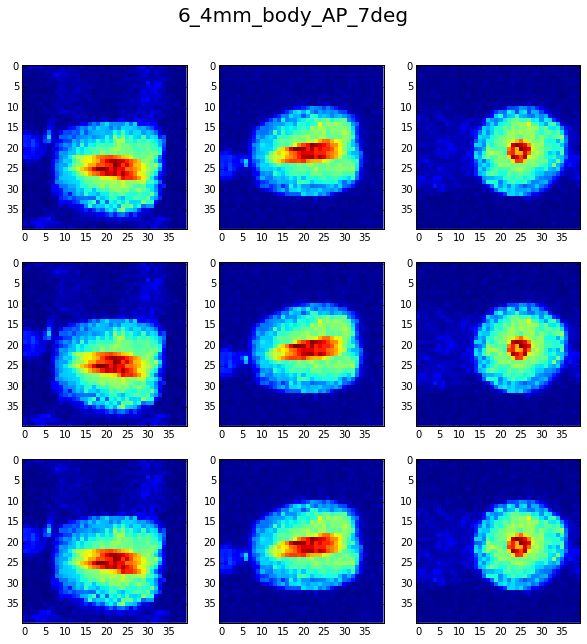

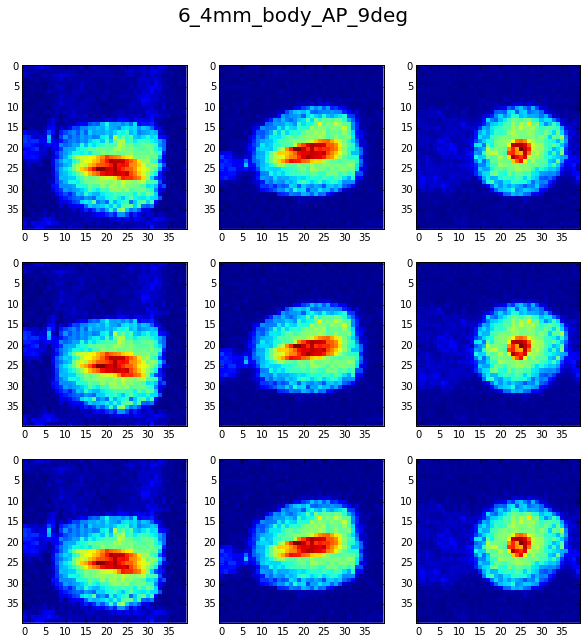

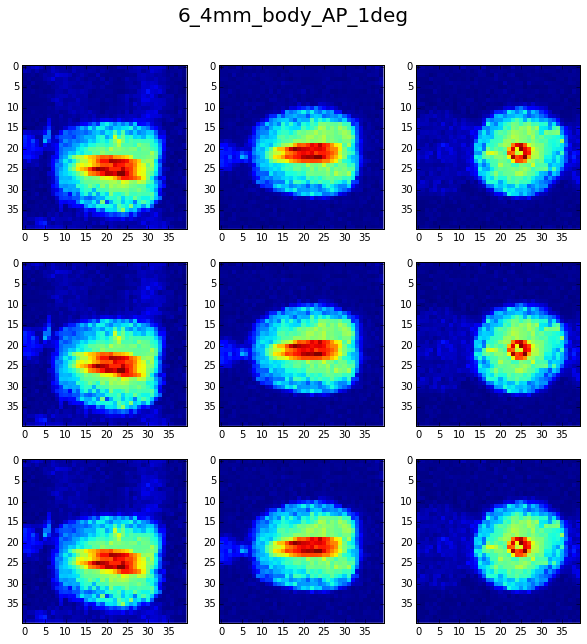

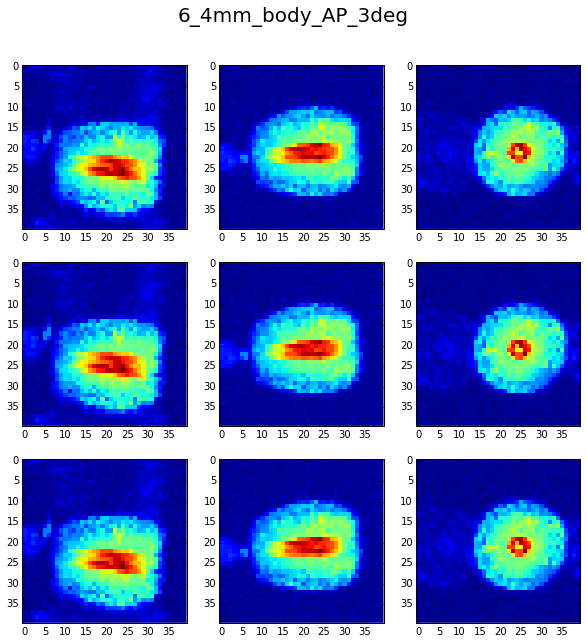

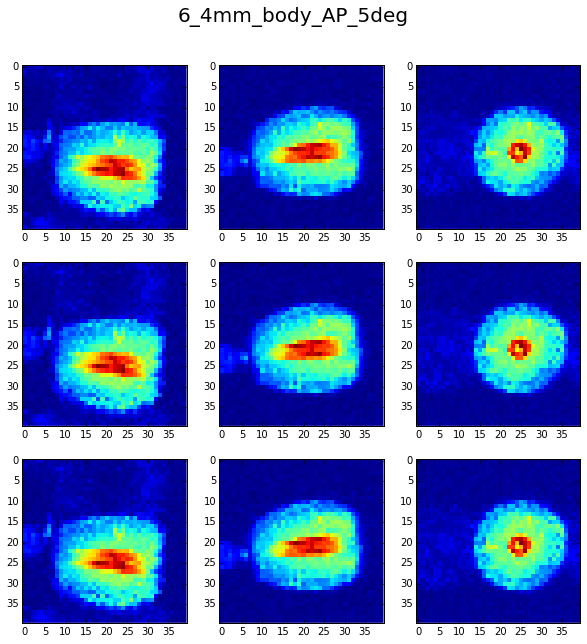

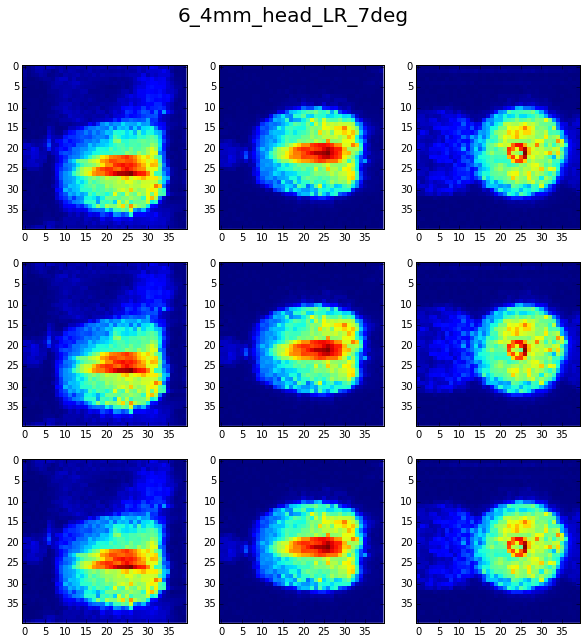

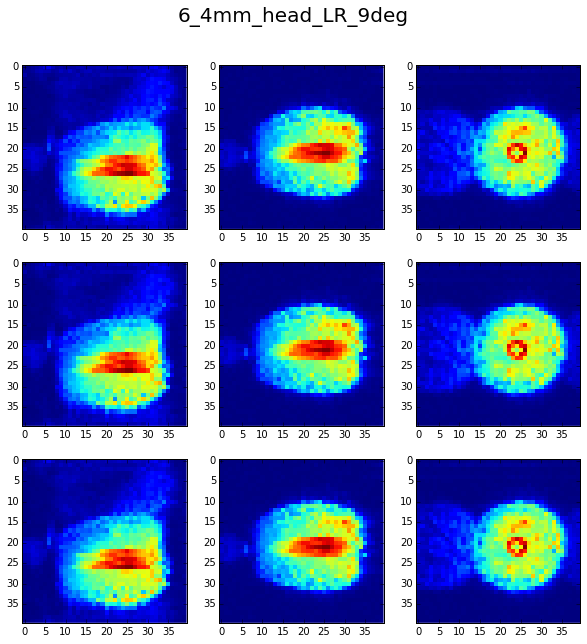

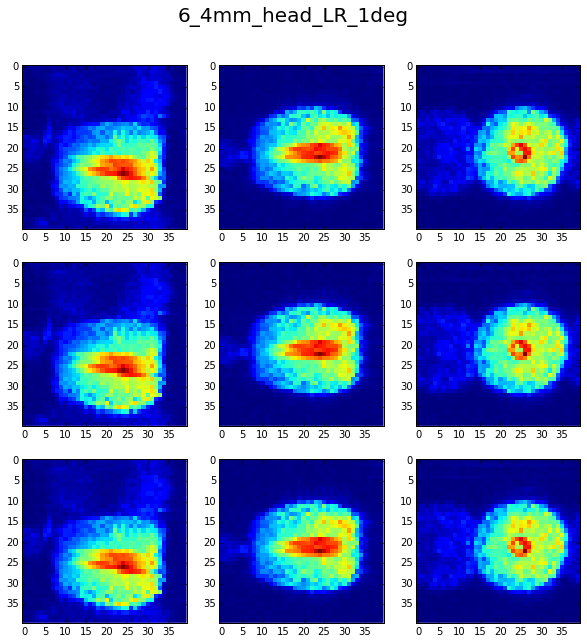

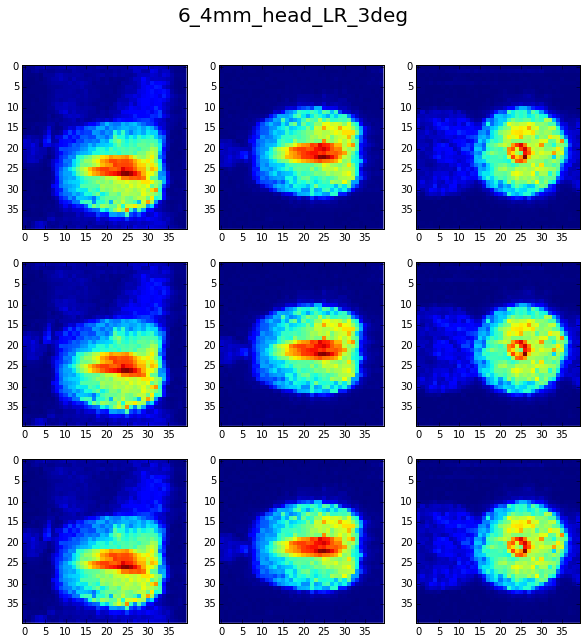

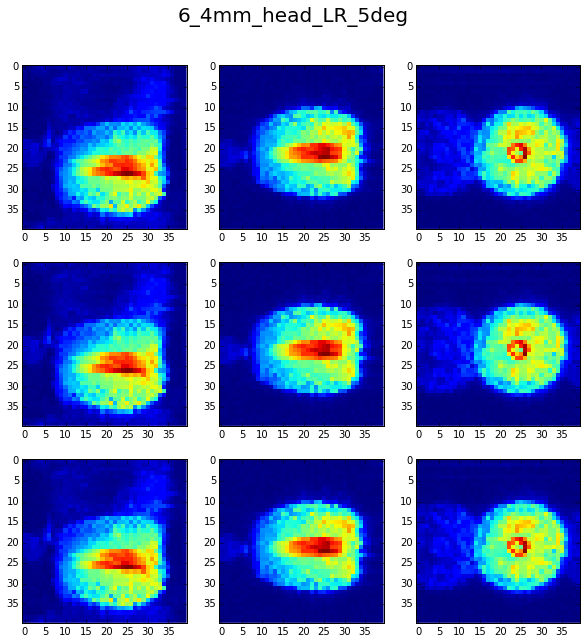

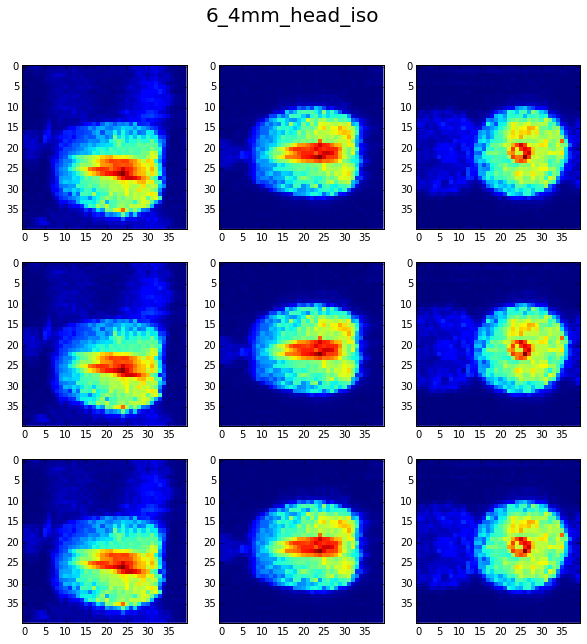

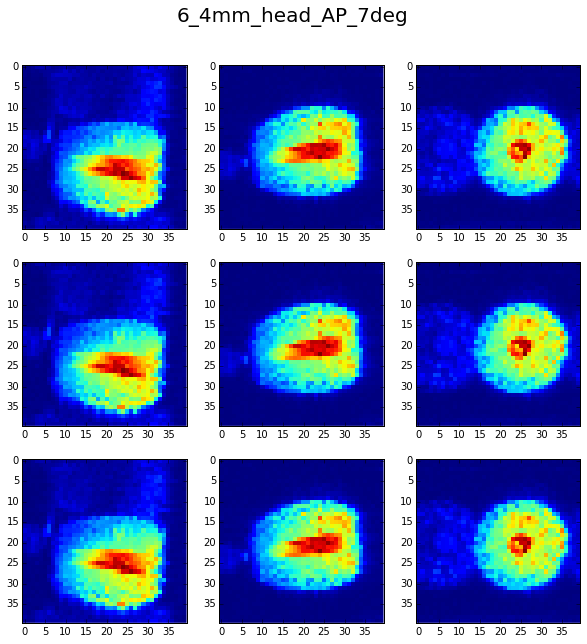

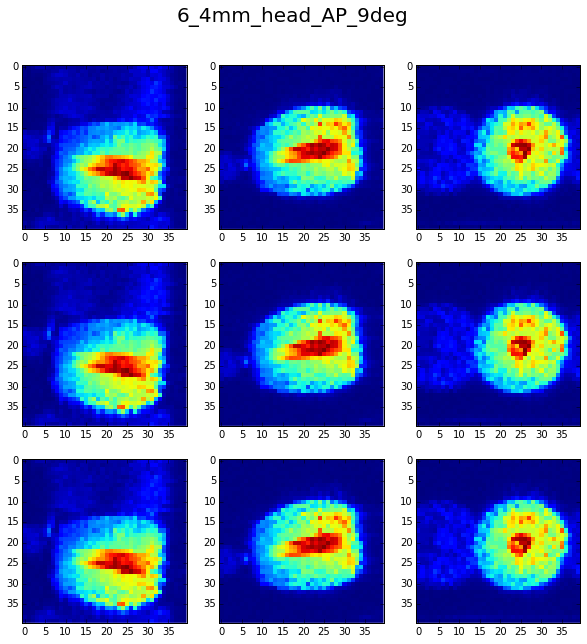

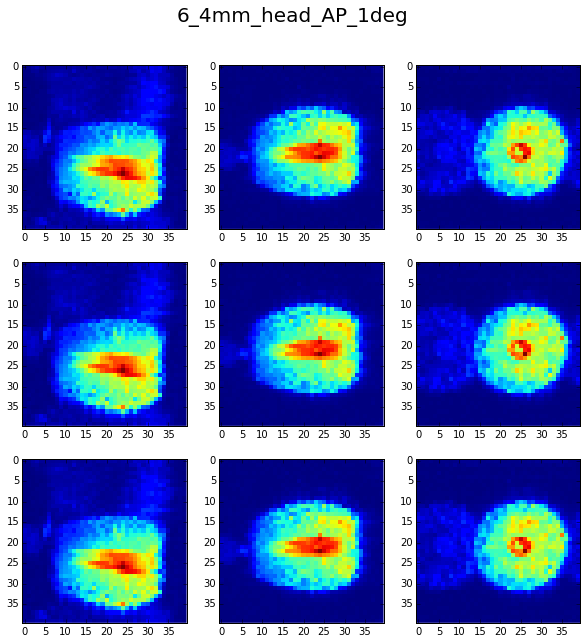

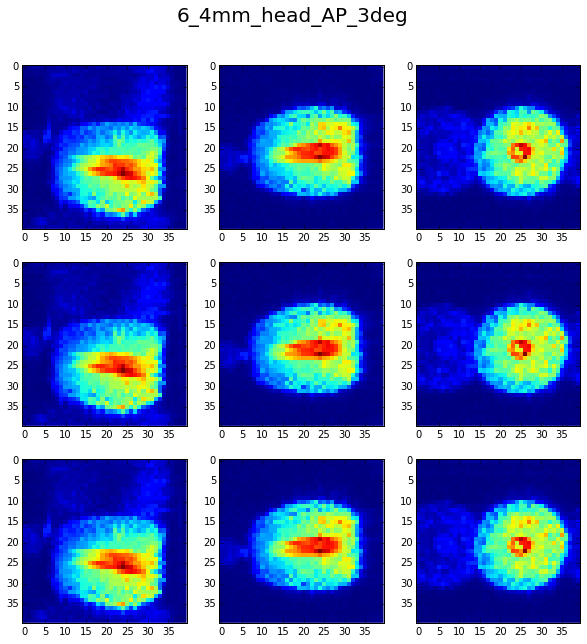

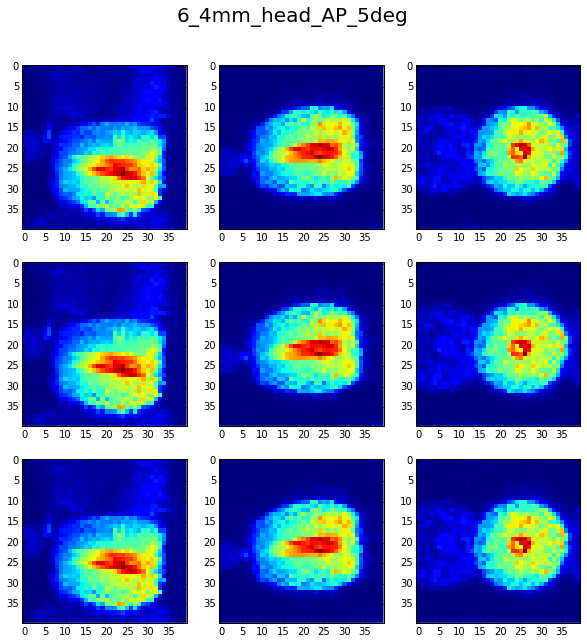

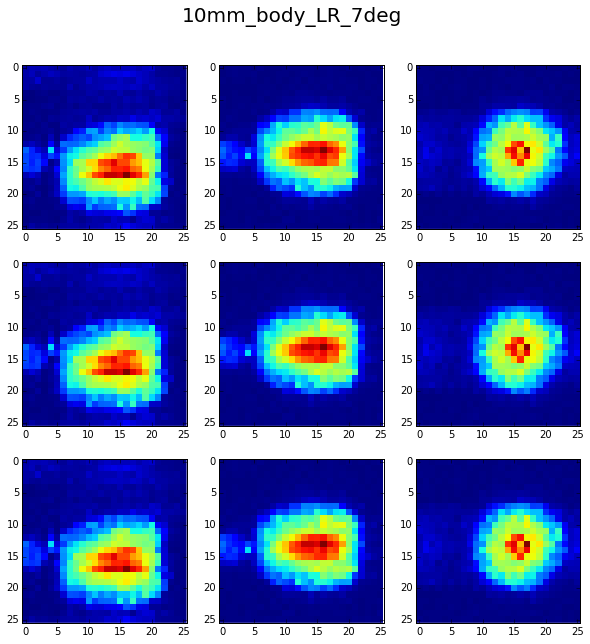

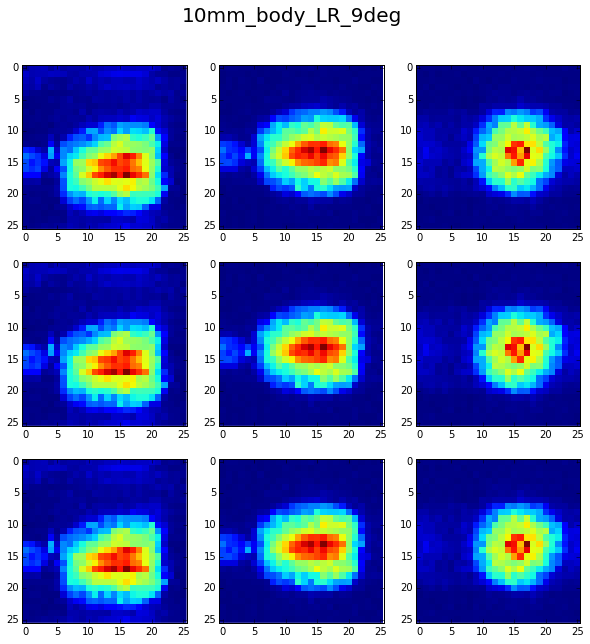

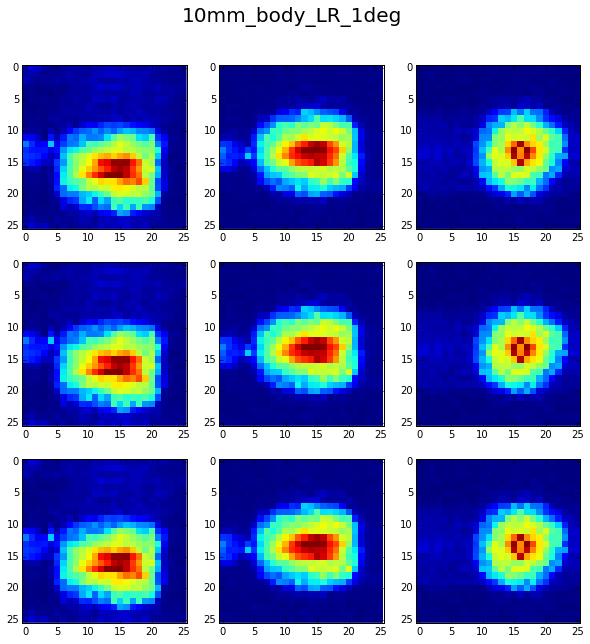

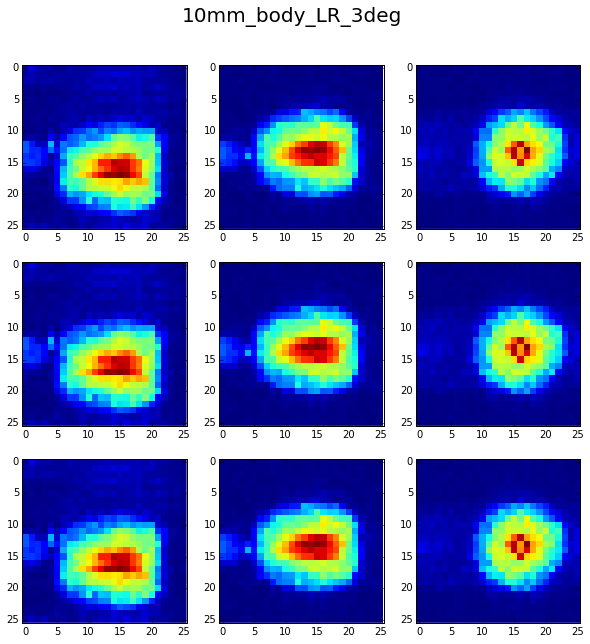

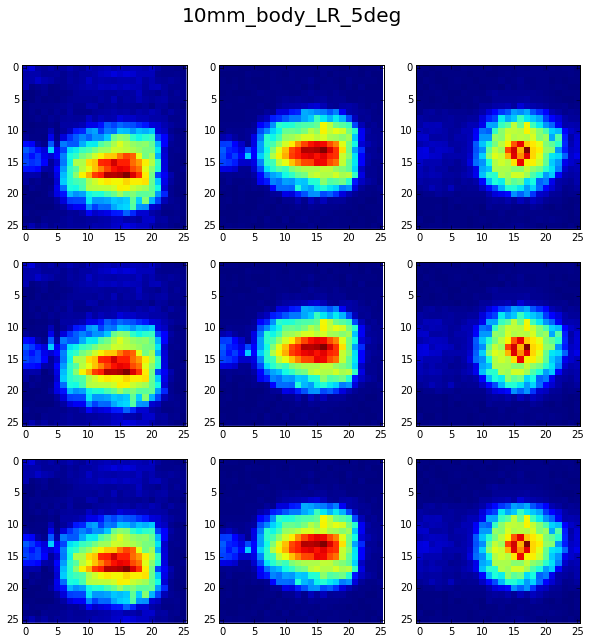

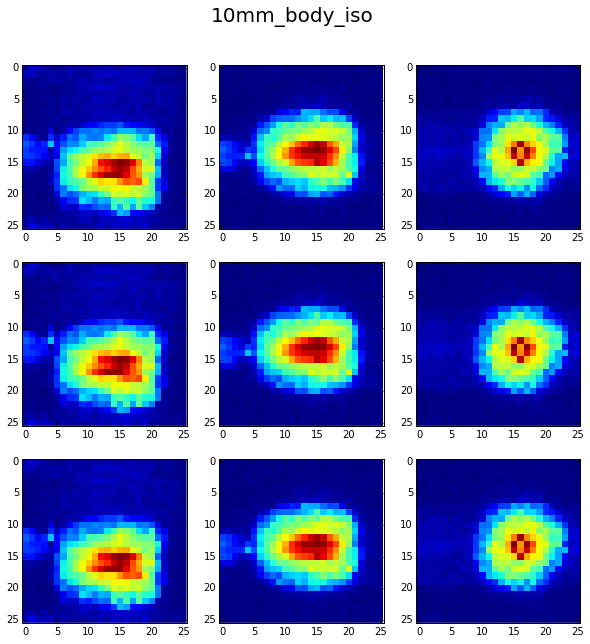

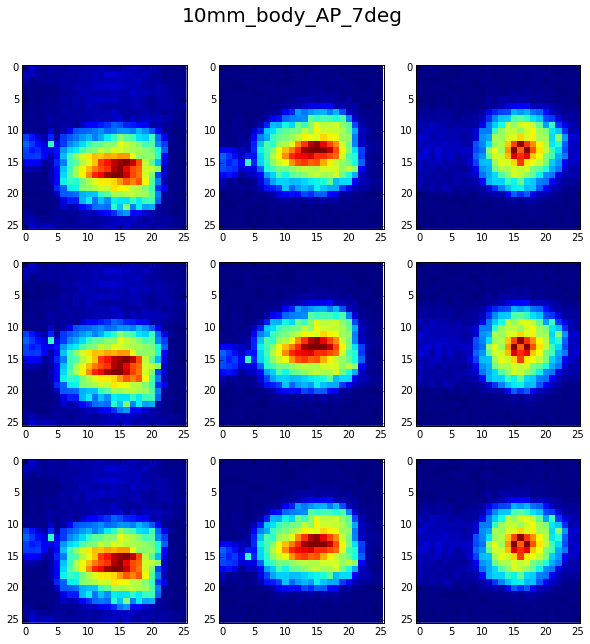

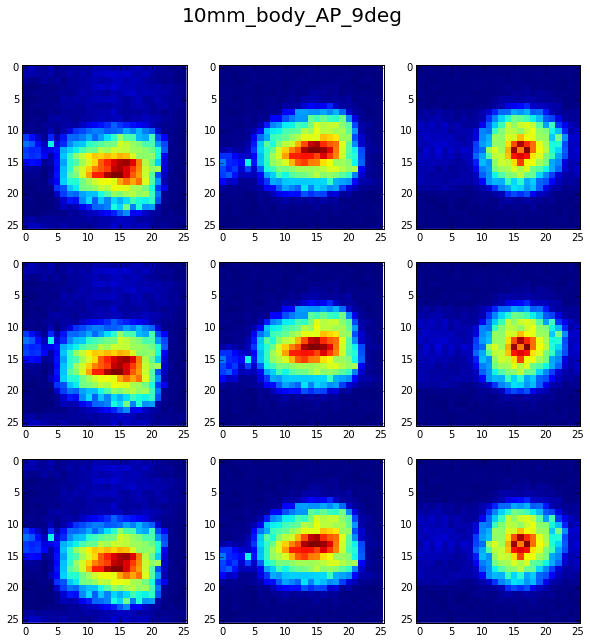

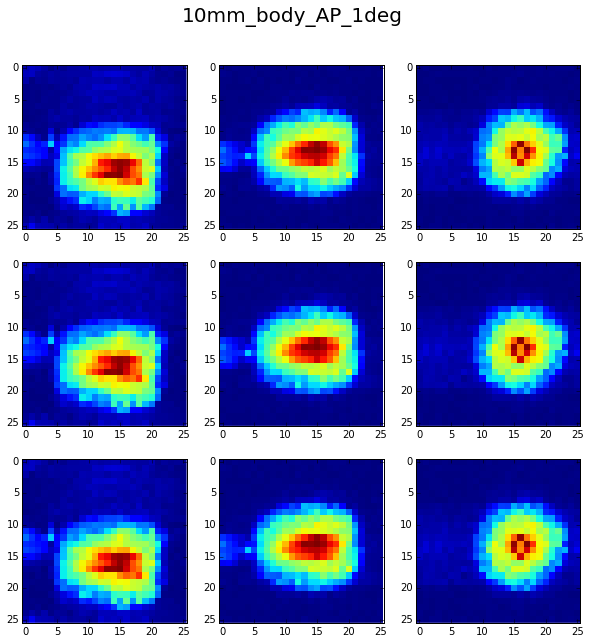

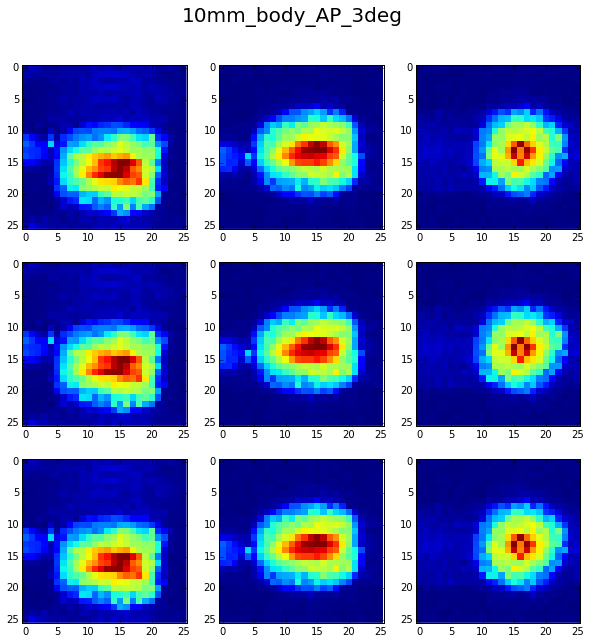

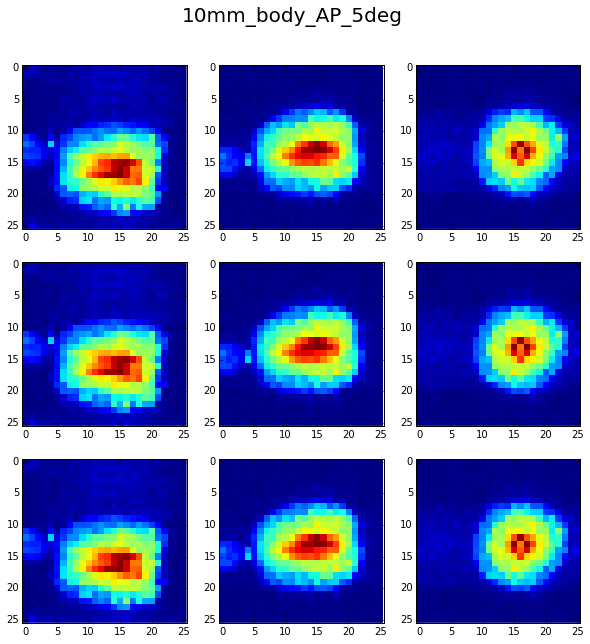

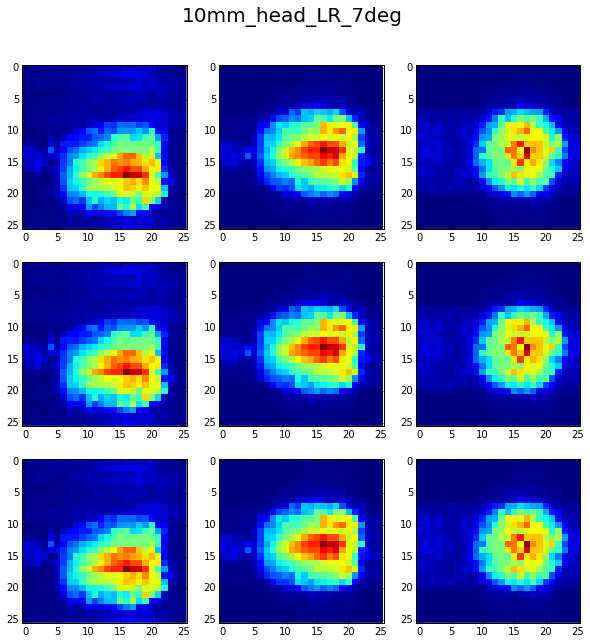

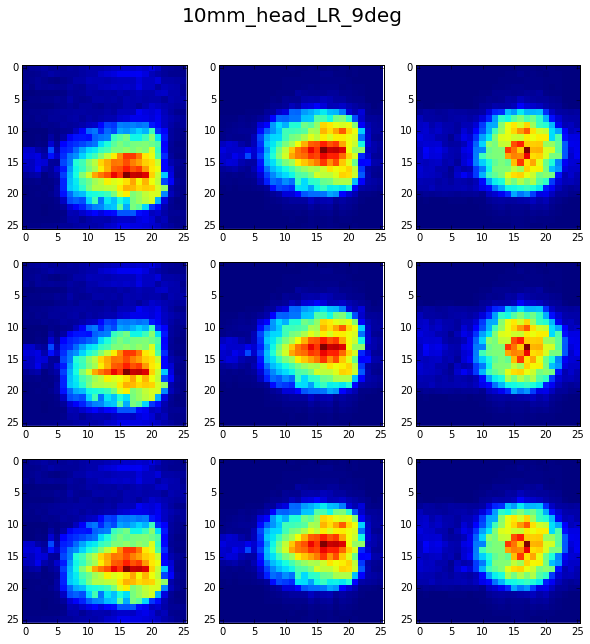

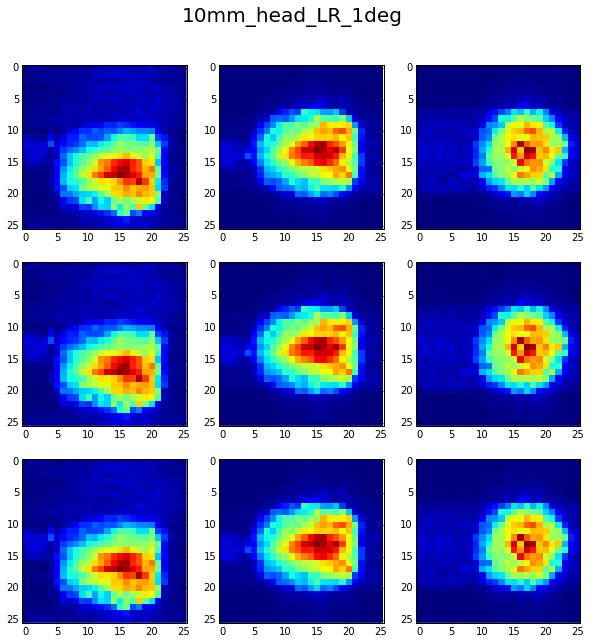

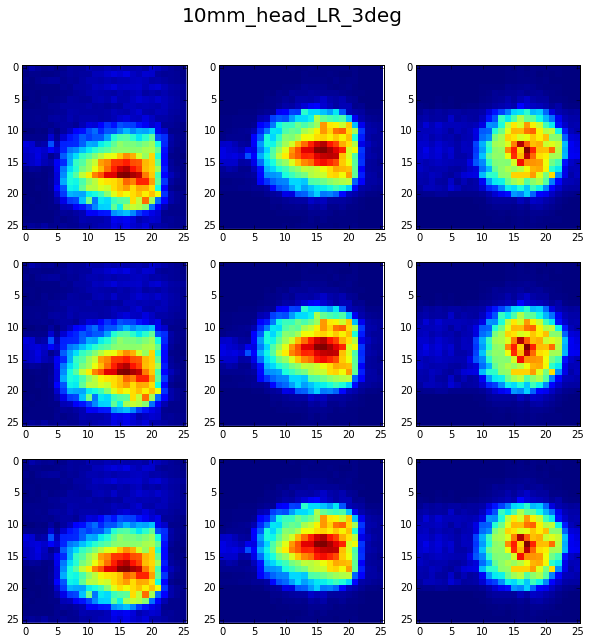

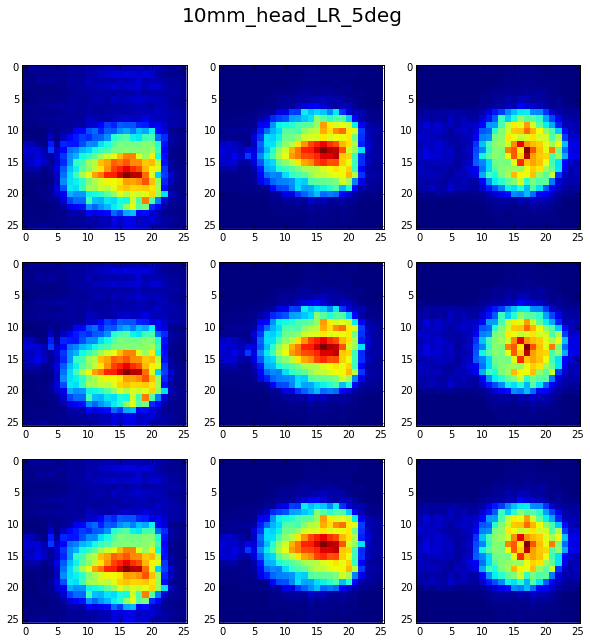

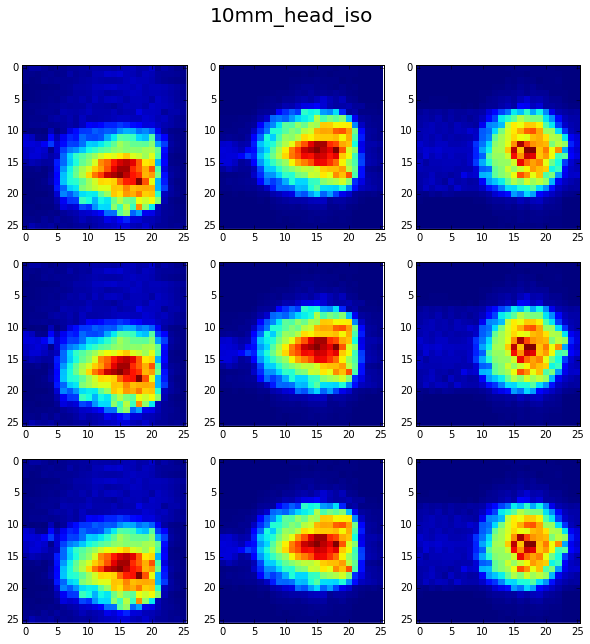

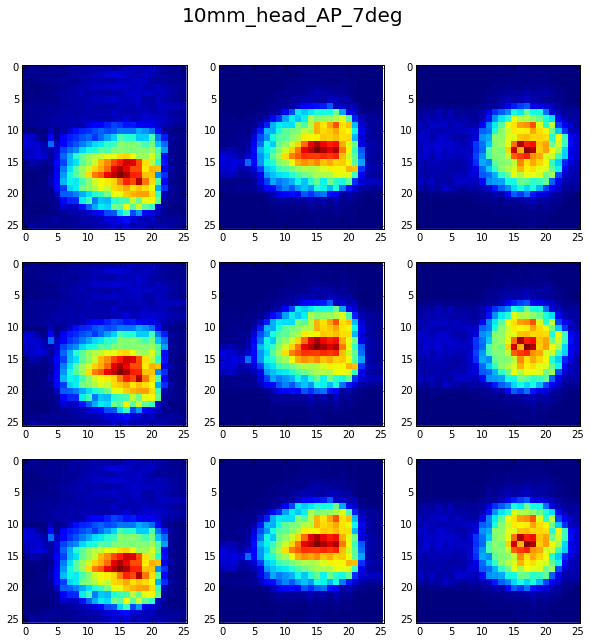

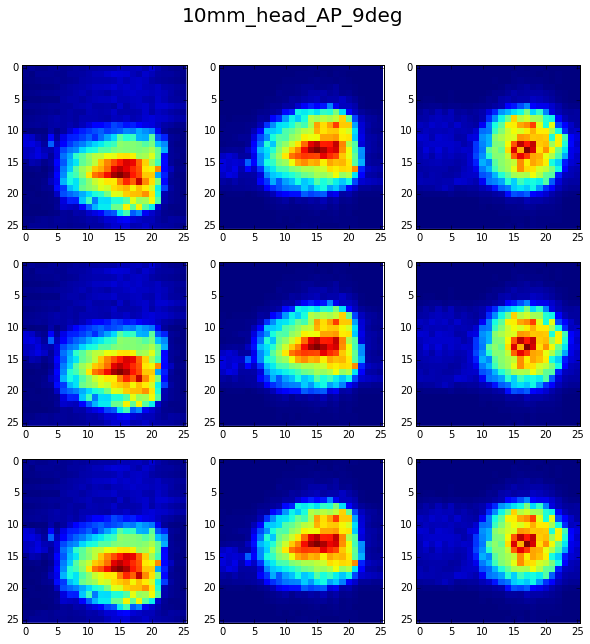

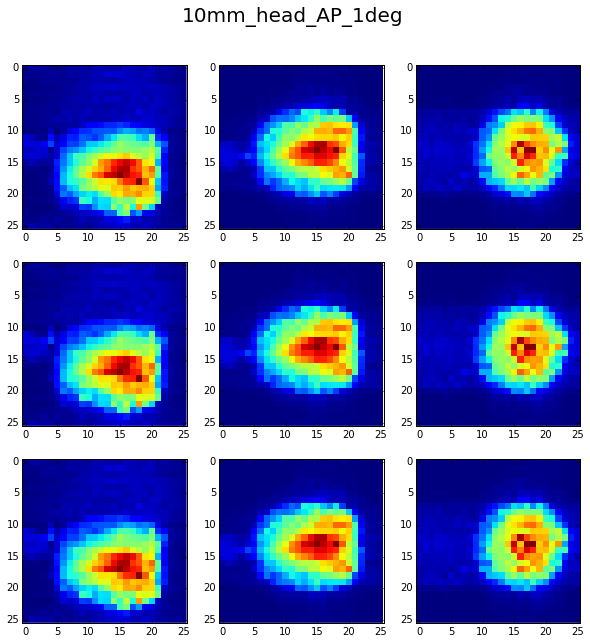

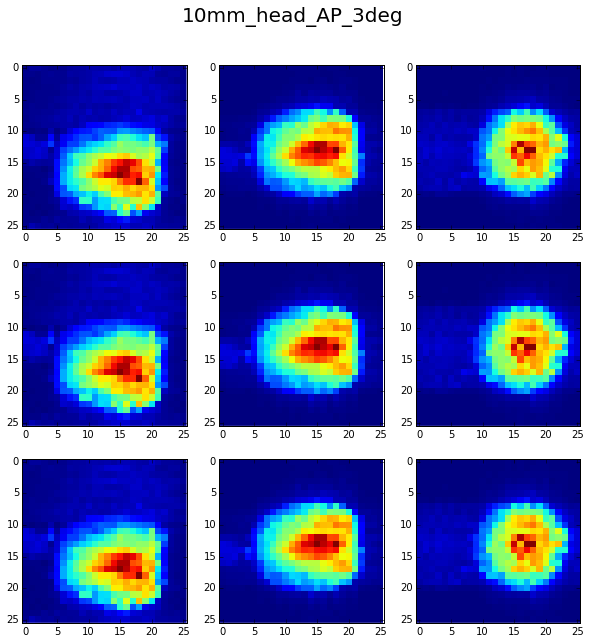

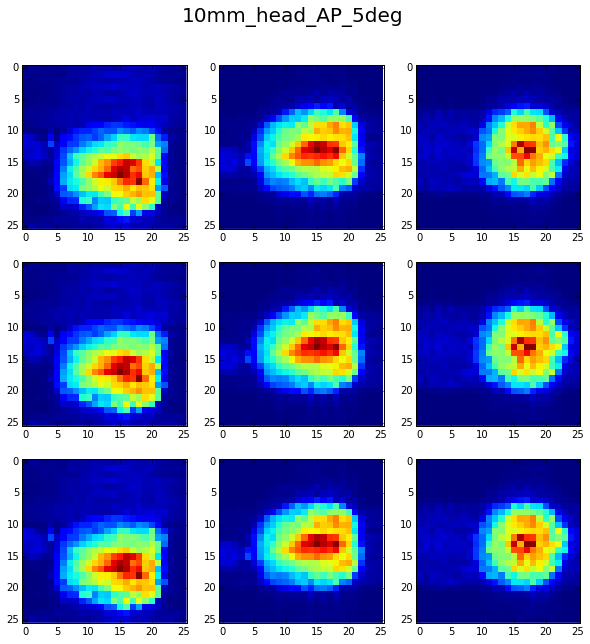

In [10]:
for res, dict_res in data_dict.iteritems():
    for coil, dict_coil in dict_res.iteritems():
        for rot, dict_rot in dict_coil.iteritems():
            if(rot == 'iso'):
                plot_volumes(dict_rot, res, coil, rot)
            else:
                for deg, dict_deg in dict_rot.iteritems():
                    plot_volumes(dict_rot[deg], res, coil, rot, deg)

In [38]:
from data_dict import get_data_dict
dict_3res = get_data_dict()
pickle.dump(dict_3res,open('dict_3res.p','wb'))

# Jul_2_Nav

In [5]:
def get_volumes_head(loc, res, rot, deg = None):
    '''
    returns the volume of given resolution, coil, rotation axis, and degree
    res: resolution
    coil: head or body
    rot: iso, LR or AP
    deg: 1, 3, 5, 7, and 9 degrees
    '''
    num_slice = res_to_voxel(res)
    volume = np.empty([num_slice,num_slice,num_slice])
    for s in xrange(num_slice):
        file_name = res+'_' + rot+'_' + 'body_rep_0_slice_'+str(s)+'.dat'
        file_path = loc + file_name
        slice_ = np.memmap(file_path, dtype=np.complex64, mode='c', shape=(num_slice,1,num_slice))
        slice_ = np.array(np.linalg.norm(slice_,axis=1))                
        volume[s,:,:] = slice_
    return volume

In [5]:
path = '/Users/zyzdiana/Dropbox/THESIS/July_2_Navs/'

# create a dictionary to store all data
data_dict_head = {}
for run in ['run_1','run_2']:
    loc = path + run + '/'
    data_dict_head[run] = {}
    # list of resolutions
    resolutions = ['6_4mm','8mm','10mm']
    for res in resolutions:
        # Create a sub-dictionary for each resolution
        data_dict_head[run][res] = {}

        # read in iso of head and body coil
        data_dict_head[run][res]['iso'] = get_volumes_head(loc, res, rot = 'iso')

        # read in the rotated files of body coil
        rotations = ['0.5RL','1RL','1.5RL','2RL','2.5RL','3RL','4RL','5RL']
        for rot in rotations:
            data_dict_head[run][res][rot] = get_volumes_head(loc, res, rot)

In [6]:
pickle.dump(data_dict_head,open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/data_dict_head.p','wb'))

In [4]:
def plot_volumes_head(volume, res, rot='', run = 'run_1'):
    fig, ax = plt.subplots(1,3)
    fig.set_figheight(3)
    fig.set_figwidth(10)
    [ax[i].imshow(volume.max(axis=i), interpolation = 'None',cmap='gray') for i in xrange(3)]
    plt.suptitle(res+'_'+rot, fontsize=20)
    plt.show()
    plt.close(fig)

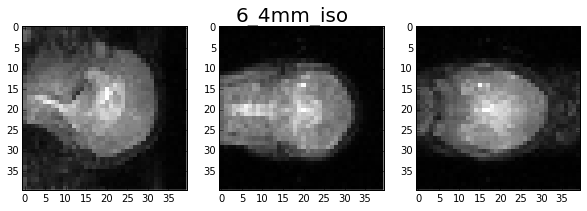

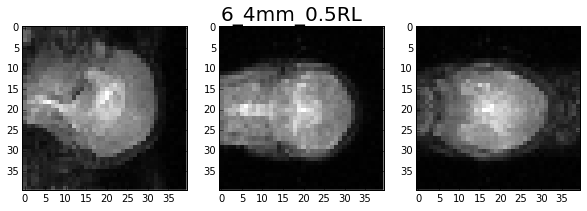

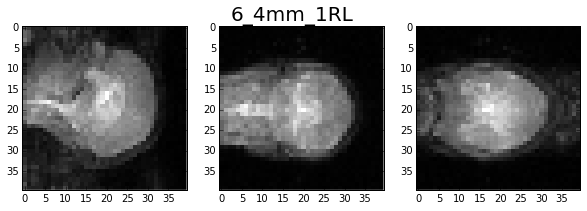

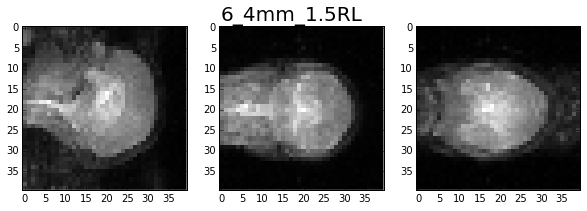

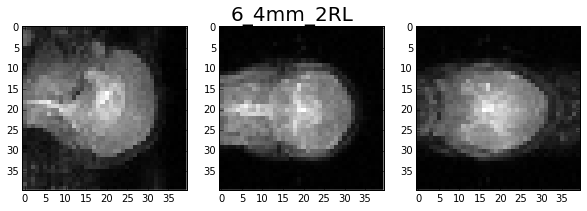

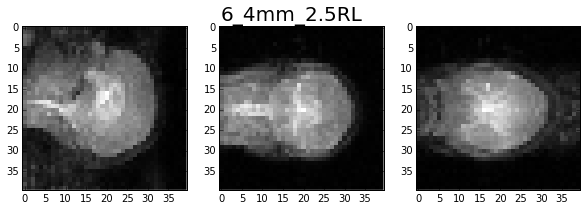

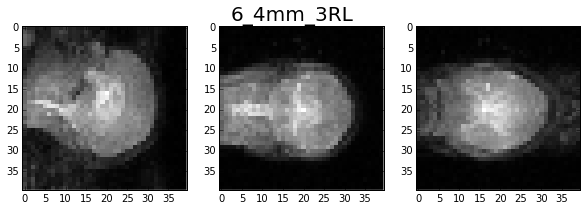

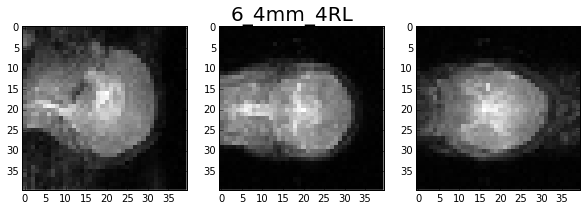

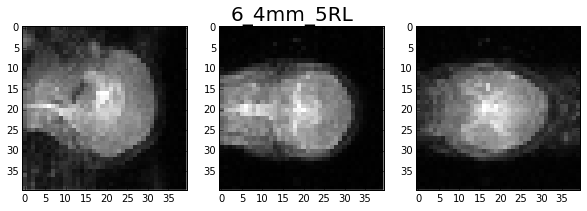

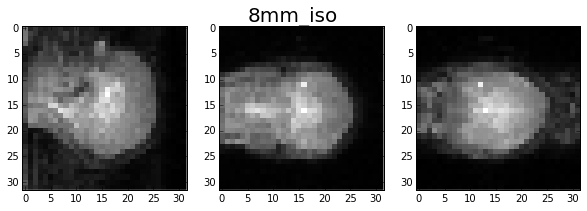

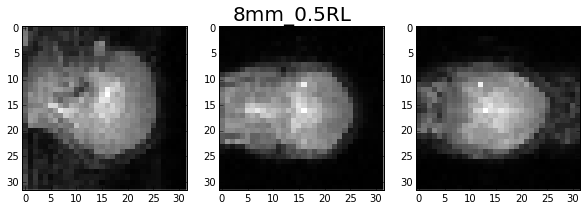

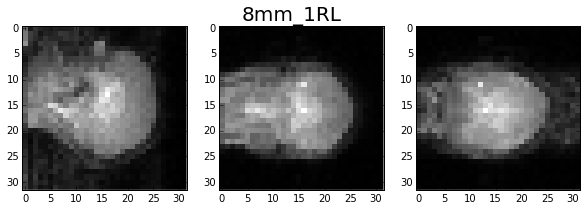

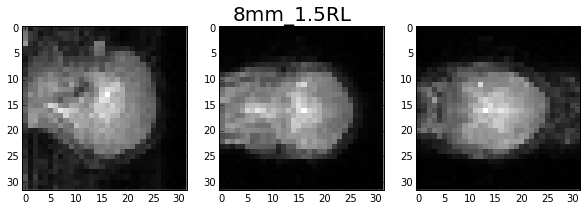

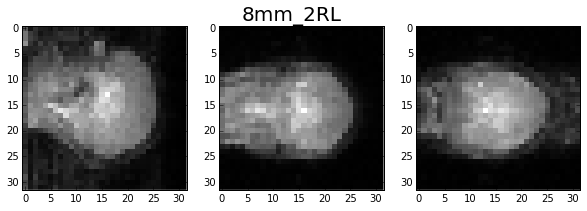

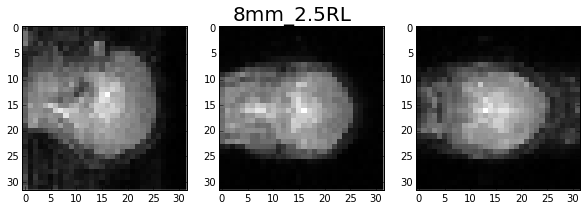

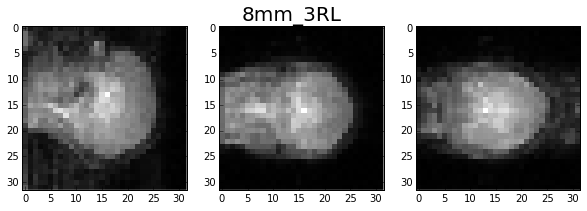

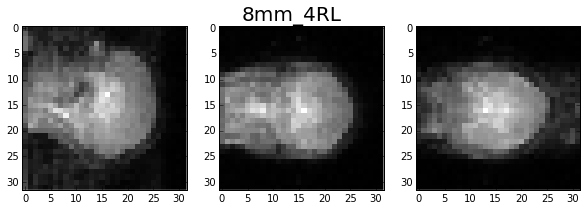

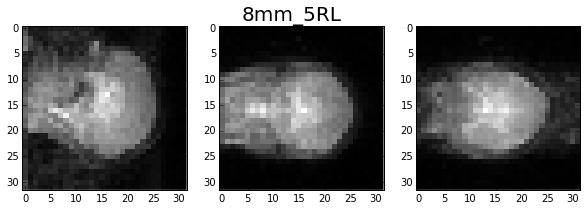

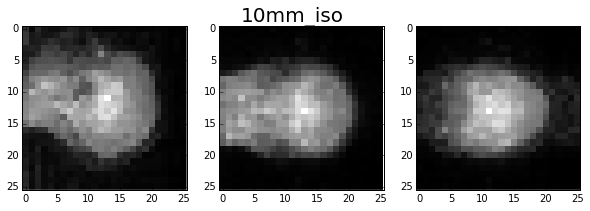

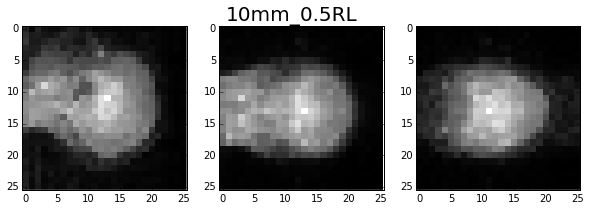

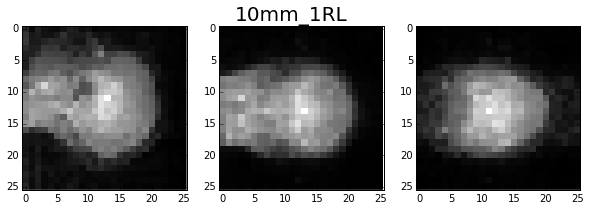

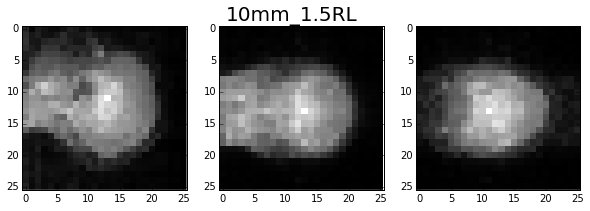

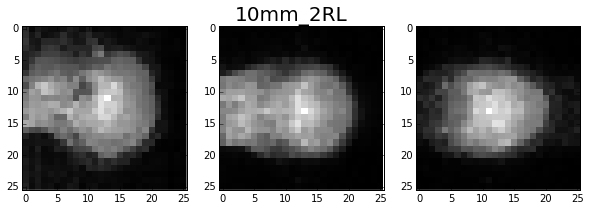

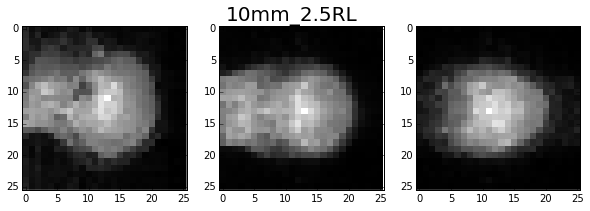

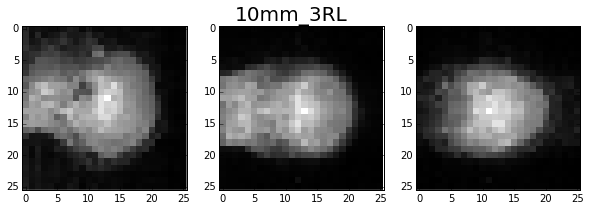

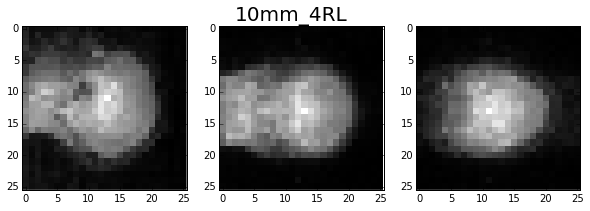

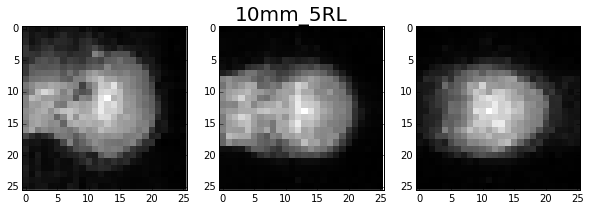

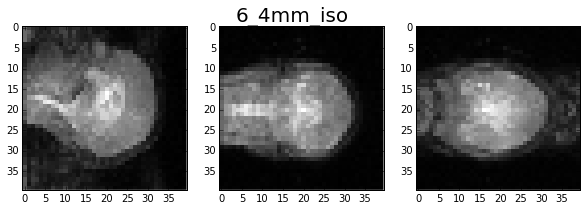

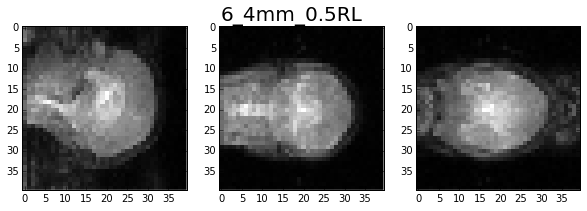

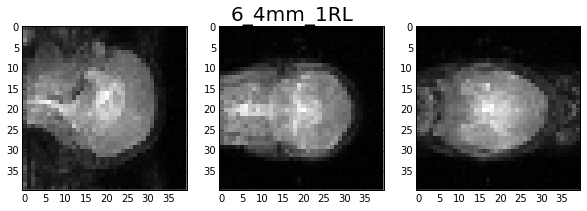

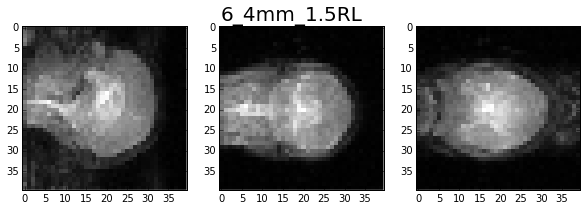

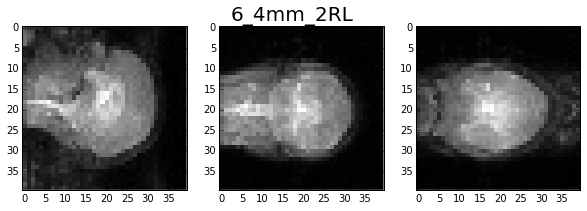

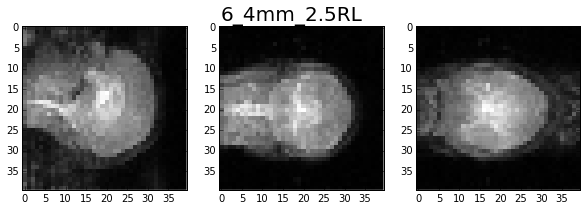

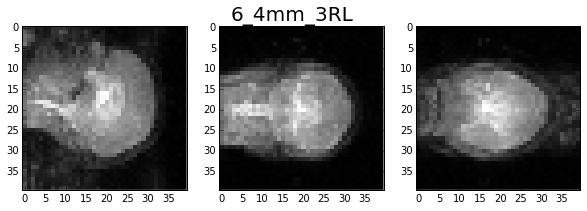

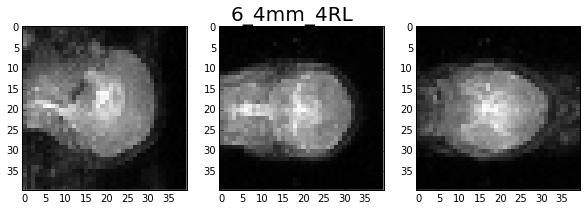

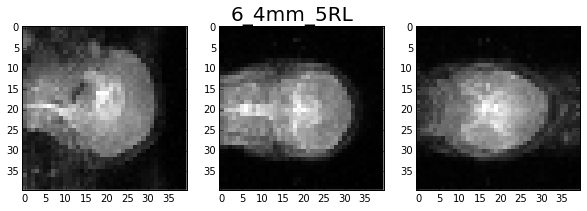

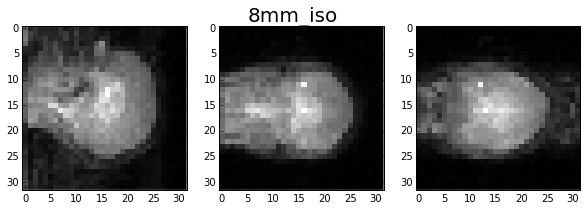

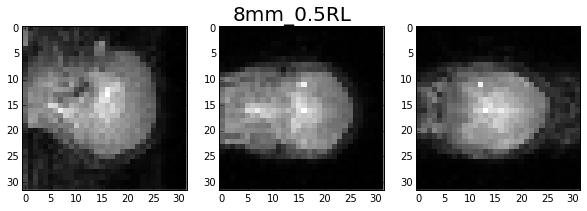

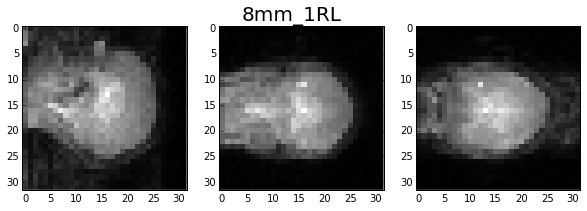

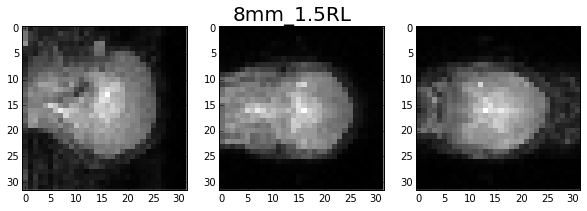

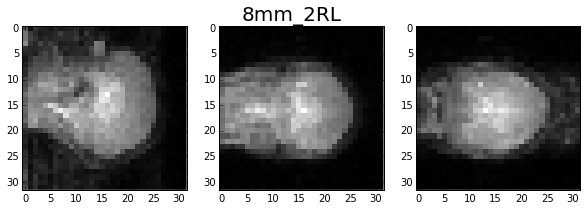

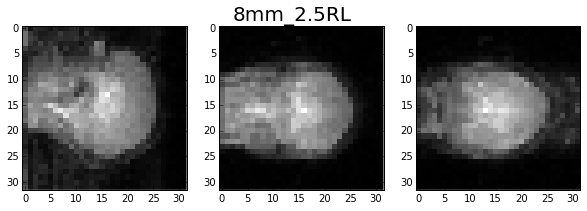

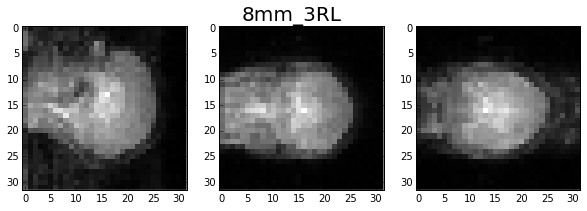

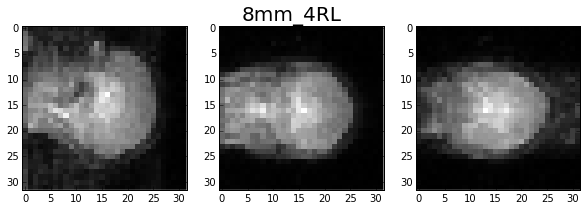

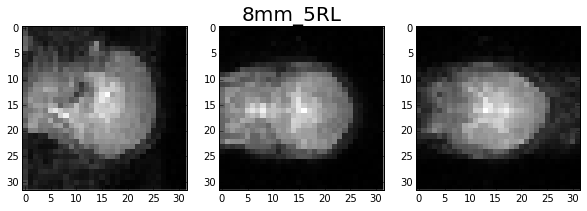

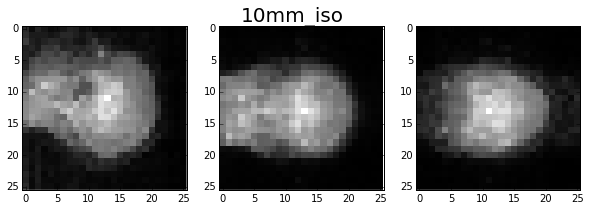

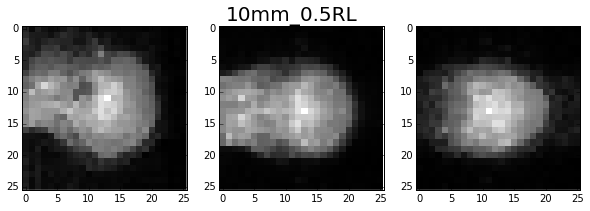

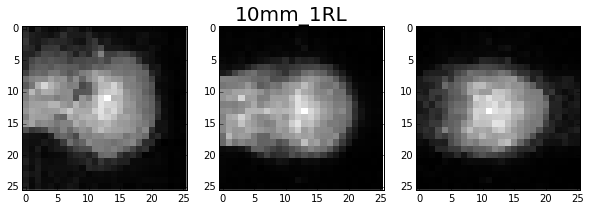

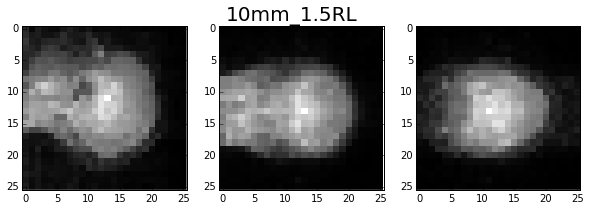

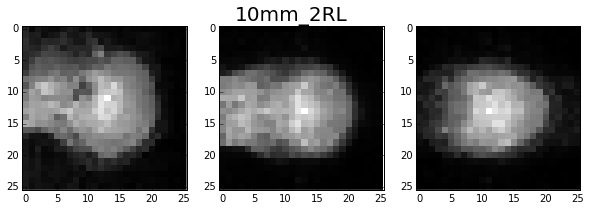

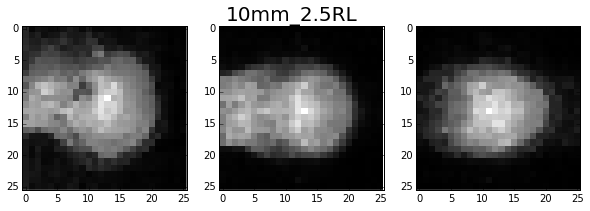

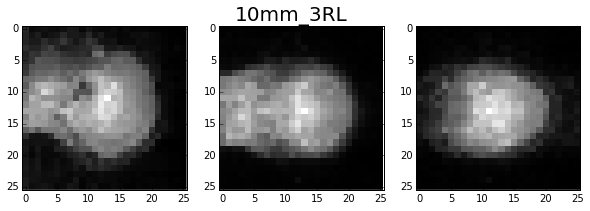

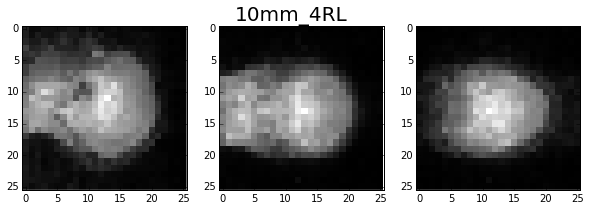

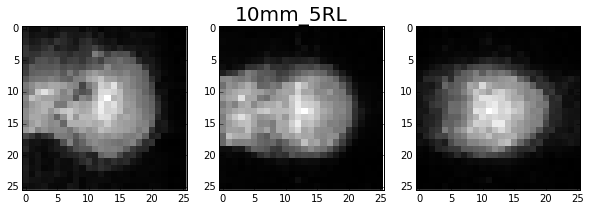

In [29]:
for run in ['run_1','run_2']:
    resolutions = ['6_4mm','8mm','10mm']
    for res in resolutions:
        rotations = ['iso','0.5RL','1RL','1.5RL','2RL','2.5RL','3RL','4RL','5RL']
        for rot in rotations:
            plot_volumes_head(data_dict_head[run][res][rot], res, rot)

In [5]:
def hann(n, radius):
    if n > radius:
        return 0
    else:
        return 0.5 + 0.5 * np.cos((np.pi*n)/float(radius))

def hann_unsafe(n, radius):
    return 0.5 + 0.5 * np.cos((np.pi*n)/float(radius))

def hann_3D_window(volume, radius):
    origin = np.array([(x - 1.0) / 2.0 for x in volume.shape])

    mask = np.array([[[hann(np.linalg.norm(np.array([x,y,z]) - origin), radius) for x in range(volume.shape[0])] for y in range(volume.shape[1])] for z in range(volume.shape[2])])

    return mask * volume

def res_to_rad(res):
    '''
    converts resolution to its corresponding voxel
    '''
    if(res == '5mm'):
        return 52/2
    if(res == '6_4mm'):
        return 40/2
    if(res == '8mm'):
        return 32/2
    if(res == '10mm'):
        return 26/2

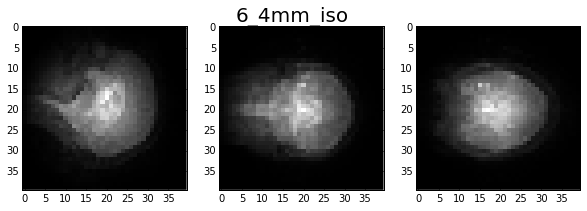

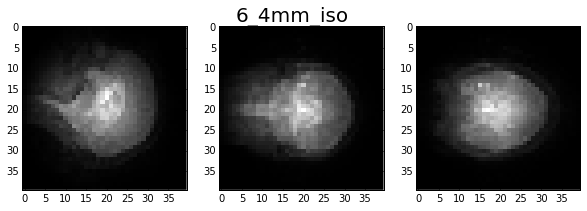

In [34]:
for run in ['run_1','run_2']:
    resolutions = ['6_4mm']
    for res in resolutions:
        rad = res_to_rad(res)*1.2
        rotations = ['iso']#,'0.5RL','1RL','1.5RL','2RL','2.5RL','3RL','4RL','5RL']
        for rot in rotations:
            #plot_volumes_head(data_dict_head[run][res][rot], res, rot)
            plot_volumes_head(hann_3D_window(data_dict_head['run_1'][res]['iso'],rad), res, rot)

30.0


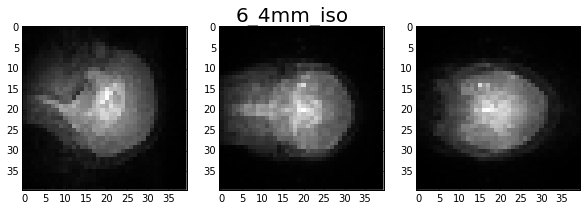

30.0


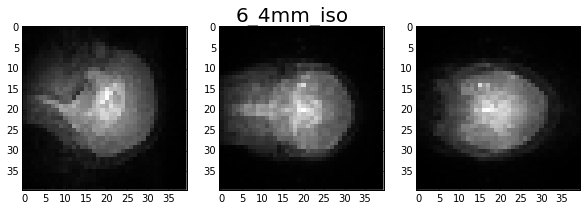

In [38]:
for run in ['run_1','run_2']:
    resolutions = ['6_4mm']
    for res in resolutions:
        rad = res_to_rad(res)*1.5
        print rad
        rotations = ['iso']#,'0.5RL','1RL','1.5RL','2RL','2.5RL','3RL','4RL','5RL']
        for rot in rotations:
            #plot_volumes_head(data_dict_head[run][res][rot], res, rot)
            plot_volumes_head(hann_3D_window(data_dict_head['run_1'][res]['iso'],rad), res, rot)

# Sept_23_Nav

In [6]:
path = '/Users/zyzdiana/Dropbox/THESIS/Sept_23_navs/'
def get_volumes_sept23(res, rot_ax, trans_ax, rep, rot_range):
    '''
    returns the volume of given resolution, coil, rotation axis, and degree
    path: path to where the files are located
    res: resolution
    rot_ax: rotation axes, x, y, z, xy, yz, xz 
    trans_ax: translation axes
    rep: repetition
    '''
    num_slice = res_to_voxel(res)
    volume = np.empty([num_slice,num_slice,num_slice])
    for s in xrange(num_slice):
        if(res == '6_4mm'):
            file_name = '%s_%s_rot_%s_deg_%s_trans_rep_%s_slice_%s.dat'%(res,rot_ax,rot_range,trans_ax,rep,s)
        else:
            file_name = '%s_iso_%s_rot_%s_deg_%s_trans_rep_%s_slice_%s.dat'%(res,rot_ax,rot_range,trans_ax,rep,s)
        slice_ = np.memmap(path+file_name, dtype=np.complex64, mode='c', shape=(num_slice,1,num_slice))
        slice_ = np.array(np.linalg.norm(slice_,axis=1))                
        volume[s,:,:] = slice_
    return volume

In [7]:
def rep_to_angle(rep, rot_range):
    counter = rep % 6
    rotation_angle = 0.0
    translation_step = rep / 6 

    if rot_range == '0_5_to_2_5':
        if(counter != 0):
            rotation_angle = 0.5 * counter
    else: 
        # range = 3.0 to 5.0
        if(counter != 0):
            rotation_angle = 3.0 + (0.5 * (counter - 1))
    return rotation_angle, translation_step

In [8]:
# Get All Axes of Rotations
files = os.listdir(path)
axes_dict = {}
for f in files:
    rot_ax = f.split('_')[2]
    trans_ax = f.split('_')[10]
    if not axes_dict.has_key(rot_ax):
        axes_dict[rot_ax] = trans_ax
print axes_dict

{'xz': 'xy', 'y': 'z', 'yz': 'xy', 'xy': 'xy', 'x': 'z', 'z': 'z'}


In [9]:
# 6.4mm
ranges = ['0_5_to_2_5','3_0_to_5_0']
sept23_dict_6_4 = {}
res = '6_4mm'
for rot_ax, trans_ax in axes_dict.iteritems():
    sept23_dict_6_4[rot_ax] = {}
    sept23_dict_6_4[rot_ax][trans_ax] = {}
    for rot_range in ranges:
        sept23_dict_6_4[rot_ax][trans_ax][rot_range] = {}
        for rep in xrange(36):
            rot_angle = rep_to_angle(rep,rot_range)
            sept23_dict_6_4[rot_ax][trans_ax][rot_range][rot_angle] = get_volumes_sept23(res, rot_ax, trans_ax, rep, rot_range)

In [10]:
# 8mm
ranges = ['0_5_to_2_5','3_0_to_5_0']
sept23_dict_8 = {}
res = '8mm'
for rot_ax, trans_ax in axes_dict.iteritems():
    sept23_dict_8[rot_ax] = {}
    sept23_dict_8[rot_ax][trans_ax] = {}
    for rot_range in ranges:
        sept23_dict_8[rot_ax][trans_ax][rot_range] = {}
        for rep in xrange(36):
            rot_angle = rep_to_angle(rep,rot_range)
            sept23_dict_8[rot_ax][trans_ax][rot_range][rot_angle] = get_volumes_sept23(res, rot_ax, trans_ax, rep, rot_range)

In [11]:
# 10mm
ranges = ['0_5_to_2_5','3_0_to_5_0']
sept23_dict_10 = {}
res = '10mm'
for rot_ax, trans_ax in axes_dict.iteritems():
    sept23_dict_10[rot_ax] = {}
    sept23_dict_10[rot_ax][trans_ax] = {}
    for rot_range in ranges:
        sept23_dict_10[rot_ax][trans_ax][rot_range] = {}
        for rep in xrange(36):
            rot_angle = rep_to_angle(rep,rot_range)
            sept23_dict_10[rot_ax][trans_ax][rot_range][rot_angle] = get_volumes_sept23(res, rot_ax, trans_ax, rep, rot_range)

In [12]:
pickle.dump(sept23_dict_10,open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_dict_10.p','wb'))
pickle.dump(sept23_dict_8,open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_dict_8.p','wb'))
pickle.dump(sept23_dict_6_4,open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/sept23_dict_6_4.p','wb'))

(0.0, 0) xz xy 0_5_to_2_5


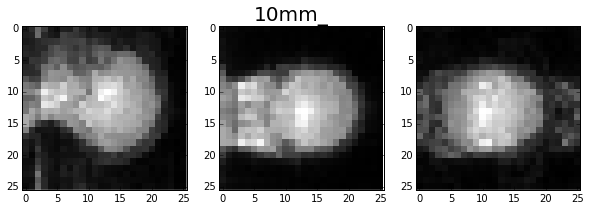

(0.0, 0) xz xy 3_0_to_5_0


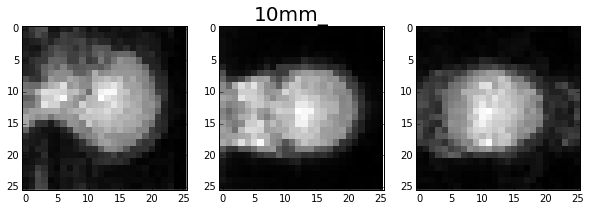

(0.5, 0) xz xy 0_5_to_2_5


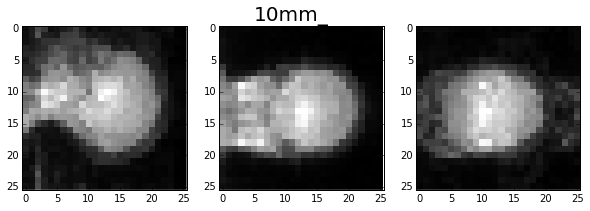

(3.0, 0) xz xy 3_0_to_5_0


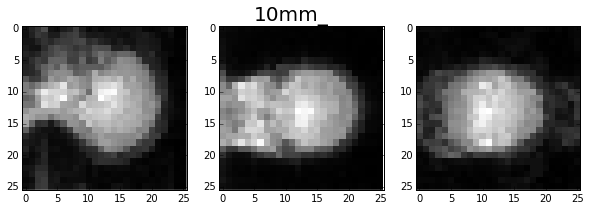

(1.0, 0) xz xy 0_5_to_2_5


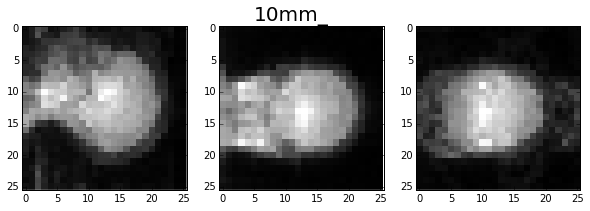

(3.5, 0) xz xy 3_0_to_5_0


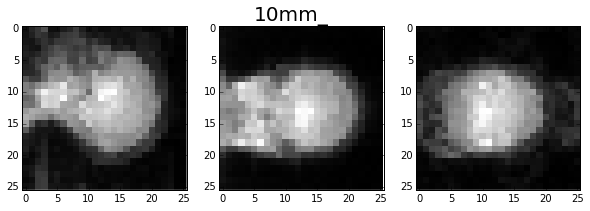

(1.5, 0) xz xy 0_5_to_2_5


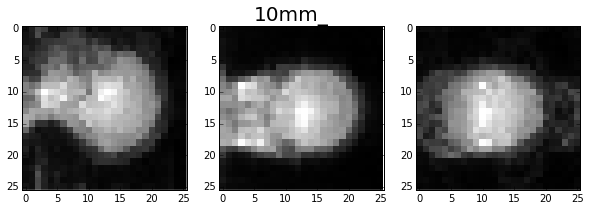

(4.0, 0) xz xy 3_0_to_5_0


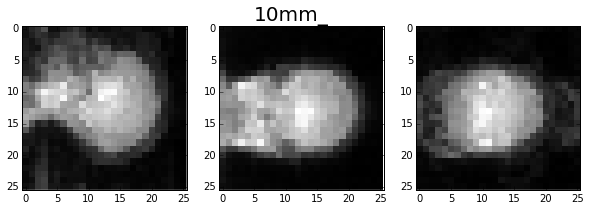

(2.0, 0) xz xy 0_5_to_2_5


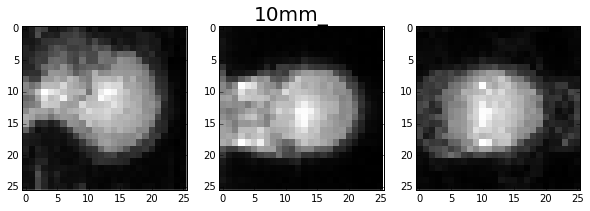

(4.5, 0) xz xy 3_0_to_5_0


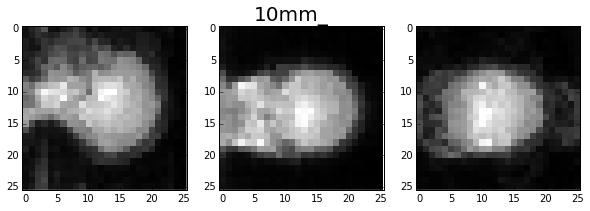

(2.5, 0) xz xy 0_5_to_2_5


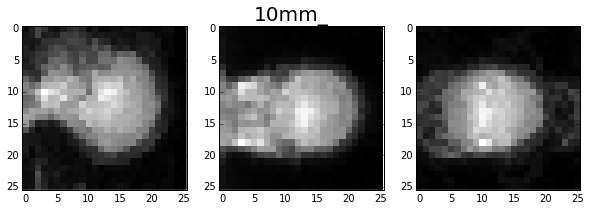

(5.0, 0) xz xy 3_0_to_5_0


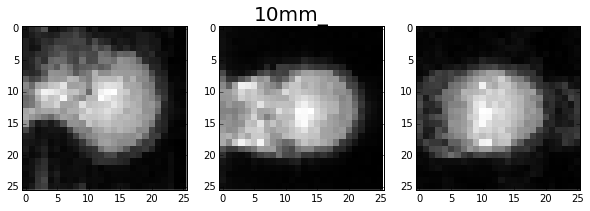

(0.0, 1) xz xy 0_5_to_2_5


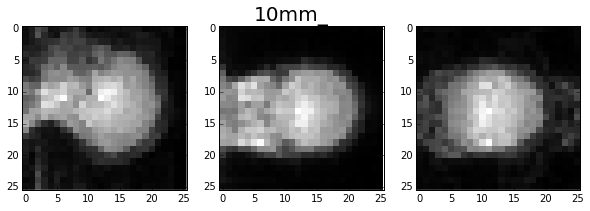

(0.0, 1) xz xy 3_0_to_5_0


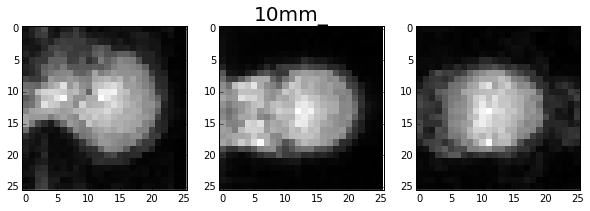

In [14]:
# 10mm
count = 0
ranges = ['0_5_to_2_5','3_0_to_5_0']
for rot_ax, trans_ax in axes_dict.iteritems():
    for rep in xrange(36):
        for rot_range in ranges:
            count += 1
            if count >= 15: break
            rot_angle = rep_to_angle(rep,rot_range)
            print str(rot_angle),rot_ax,trans_ax,rot_range
            plot_volumes_head(sept23_dict_10[rot_ax][trans_ax][rot_range][rot_angle],'10mm')

(0.0, 0) xz xy 0_5_to_2_5


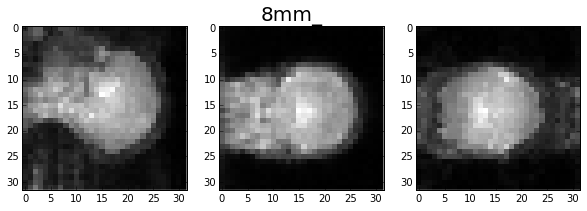

(0.5, 0) xz xy 0_5_to_2_5


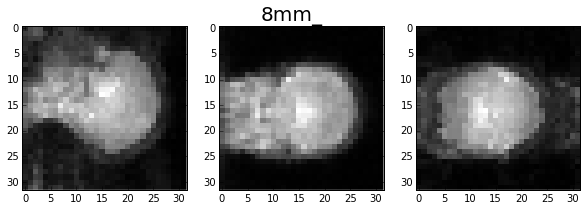

(1.0, 0) xz xy 0_5_to_2_5


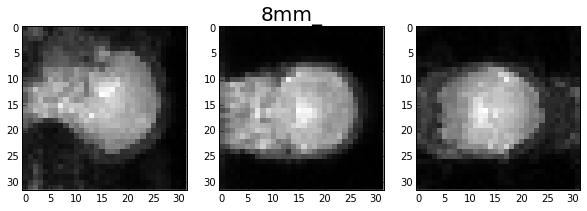

(1.5, 0) xz xy 0_5_to_2_5


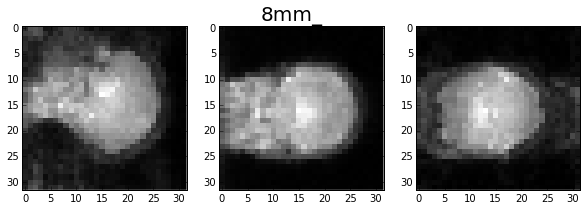

(2.0, 0) xz xy 0_5_to_2_5


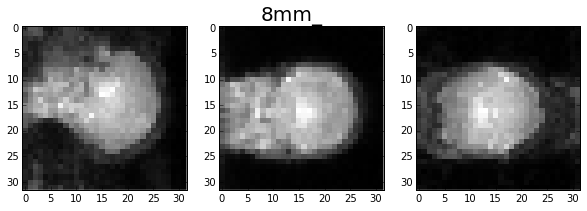

(2.5, 0) xz xy 0_5_to_2_5


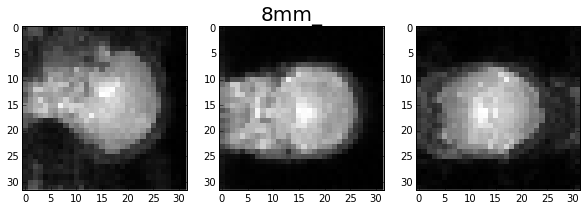

(0.0, 1) xz xy 0_5_to_2_5


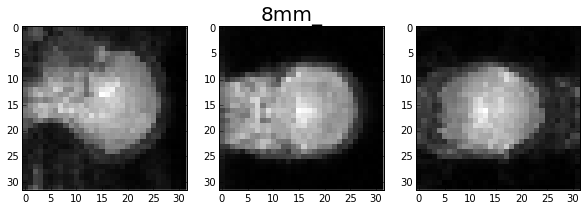

(0.5, 1) xz xy 0_5_to_2_5


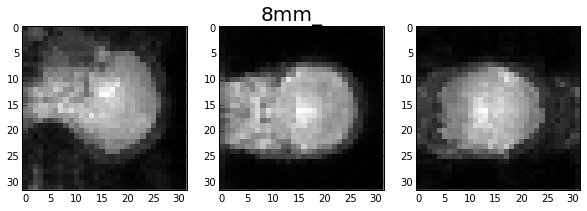

(1.0, 1) xz xy 0_5_to_2_5


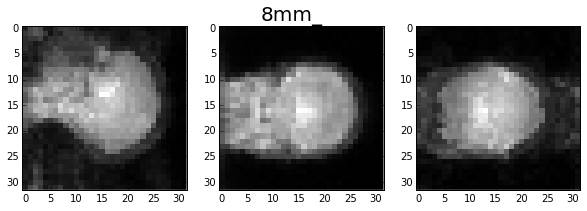

(1.5, 1) xz xy 0_5_to_2_5


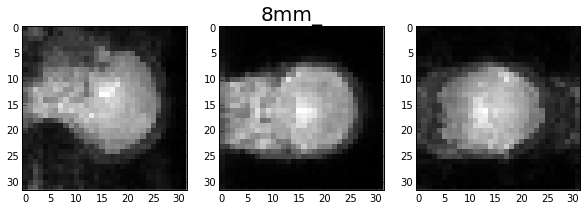

(2.0, 1) xz xy 0_5_to_2_5


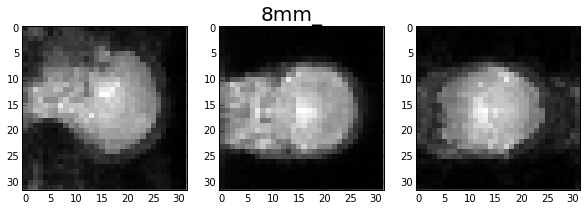

(2.5, 1) xz xy 0_5_to_2_5


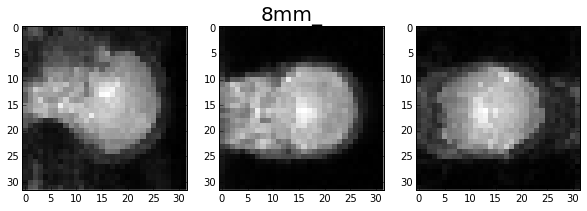

(0.0, 2) xz xy 0_5_to_2_5


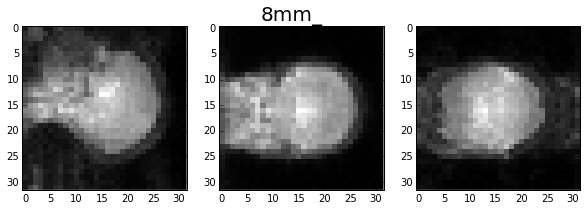

(0.5, 2) xz xy 0_5_to_2_5


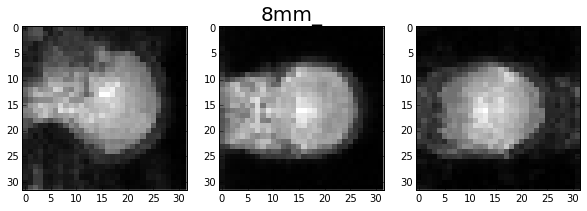

In [16]:
# 6.4mm
count = 0
ranges = ['0_5_to_2_5','3_0_to_5_0']
for rot_ax, trans_ax in axes_dict.iteritems():
    for rot_range in ranges:
        for rep in xrange(36):
            count += 1
            if count >= 15: break
            rot_angle = rep_to_angle(rep,rot_range)
            print str(rot_angle),rot_ax,trans_ax,rot_range
            plot_volumes_head(sept23_dict_8[rot_ax][trans_ax][rot_range][rot_angle],'8mm')

### Dictionary Format: sept23_dict[res][rot_ax][trans_ax][rot_range][degree]